# Tarefa - Análise Exploratória de Dados - UFRJ Analytica
#### Matheus Magalhães N. Silva

# Introdução
<div style="text-align: justify">
Para esta tarefa, escolhi, em parte, a trilha <strong>"Análise de investimentos em transporte/infraestrutura e  seus impactos"</strong>. Digo isso pois também utilizei dados de outros datasets.<br> A minha escolha se deve ao fato de que moro na Baixada Fluminense e, por isso, constantemente me encontro em engarrafamentos no trajeto Casa/Faculdade (e vice-versa). <br>Isso provoca, por vezes, uma perda de 2h ~ 3h no meu dia e, por conseguinte, impacta diretamente nos seguintes aspectos da minha vida: alimentação, estudo, lazer, sono, entre outros.<br>Sendo assim, movido pela minha situação e pela situação dos meus colegas de universidade que moram na Baixada e na Zona Oeste, decidi abordar este tópico, e tentar encontrar uma relação entre IDH/indicadores socioeconômicos e o investimento/infraestrutura no/do transporte público. Portanto, minha análise está restrita aos dados das capitais e regiões metropolitanas do RJ e SP, pois são as duas maiores metrópoles do Brasil, com infraestruturas de transporte público antagônicas.</div>

# Análise dos dados do Estado do Rio de Janeiro e sua região metropolitana

<div style="text-align: justify">
Primeiramente, é válido ressaltar quais são os municípios que compõem a região metropolitana do Estado do Rio de Janeiro. São eles: <strong>Duque de Caxias, São João de Meriti, Belford Roxo, Nilópolis, Mesquita, Nova Iguaçu, Queimados, Japeri, Paracambi, Seropédica, Itaguaí, Magé, Guapimirim, Niterói, São Gonçalo, Itaboraí, Maricá, Tanguá, Rio Bonito, Cachoeiras de Macacu e Rio de Janeiro</strong>.<br>
Portanto, minha análise, em relação ao RJ, ficará restrita a estes municípios, com destaque para os municípios do Rio de Janeiro (capital) e os municípios da Baixada Fluminense.
<br>
Portanto, o primeiro passo é definir os <i>dataset's</i> que utilizarei e tratar os dados provenientes destes.

In [5]:
import sys
sys.path.append(r'c:\users\emine\appdata\local\programs\python\python310\lib\site-packages')

# Importando as bibliotecas necessárias
import basedosdados as bd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="text-align: justify">
O primeiro <i><strong>dataset</strong></i> que analisarei é o <strong>Mobilidados</strong>.<br>
</div>
A primeira análise que quero fazer usando os dados deste dataset é:<br>

## Será que existe alguma relação entre o tempo de deslocamento entre casa e trabalho e a renda das pessoas?
Minha hipótese é que renda e tempo de deslocamento são inversamente proporcionais, ou seja, quanto maior a renda, menor é o tempo de deslocamento. Logo, utilizarei a tabela tempo_deslocamento_casa_trabalho, que contém dados de 2010.

In [9]:
dfTempoDeslocamento = bd.read_table(
    dataset_id='br_mobilidados_indicadores',
    table_id='tempo_deslocamento_casa_trabalho',
    billing_project_id='tarefa-analytica-1'
)

Downloading: 100%|████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 610.29rows/s]


In [11]:
filtroRJ = dfTempoDeslocamento["sigla_uf"] == "RJ"
dfRJ = dfTempoDeslocamento[filtroRJ]
dfRJ

,ano,sigla_uf,id_municipio,tempo_medio_deslocamento,prop_deslocamento_acima_1_hora
105,2010,RJ,3300456,59,43.0
106,2010,RJ,3300803,27,9.0
107,2010,RJ,3301702,50,32.0
108,2010,RJ,3301850,35,17.0
109,2010,RJ,3301900,48,30.0
110,2010,RJ,3302007,32,10.0
111,2010,RJ,3302270,67,53.0
112,2010,RJ,3302502,46,29.0
113,2010,RJ,3302700,45,28.0
114,2010,RJ,3302858,50,33.0


In [13]:
# Calculo a média do tempo de deslocamento no RJ
mediaTempoDeslocamentoRJ = sum(dfRJ["tempo_medio_deslocamento"]) / len(dfRJ["tempo_medio_deslocamento"])
print(f"Tempo médio de deslocamento nos municípios do RJ é de {mediaTempoDeslocamentoRJ:.2f} min.")  # A média encontrada é de 45.67 min.

# Calculo a média da proporção da população que tem deslocamento > 1h
mediaPropRJ = sum(dfRJ["prop_deslocamento_acima_1_hora"]) / len(dfRJ["prop_deslocamento_acima_1_hora"])
print(f"Aproximadamente, {mediaPropRJ:.2f}% da população fluminense leva mais de 1h para se deslocar.")  # A média encontrada é de 27.62%.

# Crio um DataFrame com os municípios com tempo médio > média do tempo OU com proporção > média de proporção
dfMaiorTempoPropRJ = dfRJ[
    (dfRJ["tempo_medio_deslocamento"] > mediaTempoDeslocamentoRJ) |
    (dfRJ["prop_deslocamento_acima_1_hora"] > mediaPropRJ)
]

# Obtenho os códigos dos municípios com tempo médio > média ou proporção > média
codigosMunicipiosMaiorTempoProp = dfMaiorTempoPropRJ["id_municipio"].tolist()

print("Códigos dos municípios com tempo médio de deslocamento ou proporção acima da média:")
print(codigosMunicipiosMaiorTempoProp)


Tempo médio de deslocamento nos municípios do RJ é de 45.67 min.
Aproximadamente, 27.62% da população fluminense leva mais de 1h para se deslocar.
Códigos dos municípios com tempo médio de deslocamento ou proporção acima da média:
['3300456', '3301702', '3301900', '3302270', '3302502', '3302700', '3302858', '3303203', '3303500', '3304144', '3304557', '3304904', '3305109']


<div style="text-align: justify">
Agora c/ os códigos dos municípios fluminenses c/ tempo médio de deslocamento acima da média estadual ou com proporção da população que leva mais de 1h no trânsito acima da média, posso averiguar a renda média destes municípios.<br>
P/ isso, utilizarei a tabela <strong>'municipio'</strong> do dataset <strong>Atlas do Desenvolvimento Humano</strong>, de 2010.
</div>

In [16]:
dfADH2010 = bd.read_table(
    dataset_id='mundo_onu_adh',
    table_id='municipio',
    billing_project_id='tarefa-analytica-1'
)

Downloading: 100%|████████████████████████████████████████████████████████████| 16695/16695 [00:54<00:00, 303.75rows/s]


In [18]:
media_idhm_2010 = sum(dfADH2010["idhm"])/len(dfADH2010["idhm"]) # Média dos IDH's municipais em 2010.
media_idhm_e_2010 = sum(dfADH2010["idhm_e"])/len(dfADH2010["idhm_e"])  # Média dos IDH's municipais educacionais em 2010.
media_idhm_r_2010 = sum(dfADH2010["idhm_r"])/len(dfADH2010["idhm_r"])  # Média dos IDH's municipais de renda em 2010.

In [20]:
# Filtra o DataFrame para ano 2010 e municípios presentes em 'codigosMunicipiosMaiorTempoProp'
dfADH2010_filtrado = dfADH2010[
    (dfADH2010["ano"] == 2010) & 
    (dfADH2010["id_municipio"].isin(codigosMunicipiosMaiorTempoProp))
]

# Exibe o DataFrame filtrado
dfADH2010_filtrado

,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
14312,2010,3300456,73.50,2.08,16.54,18.61,45.09,92.58,80.94,6.18,...,398520.0,46240.0,26220.0,326060.0,0.549,0.624,0.684,0.598,0.808,0.662
14328,2010,3301702,75.00,1.73,14.07,15.83,44.20,92.51,82.17,6.61,...,729834.0,80472.0,46285.0,603077.0,0.584,0.645,0.711,0.624,0.833,0.692
14332,2010,3301900,73.75,2.05,15.04,16.92,42.89,91.48,80.02,6.56,...,187193.0,20011.0,11366.0,155816.0,0.528,0.629,0.693,0.593,0.813,0.690
14338,2010,3302270,73.51,2.14,16.20,18.23,46.16,91.47,79.99,5.64,...,80236.0,9545.0,5857.0,64834.0,0.472,0.602,0.659,0.555,0.809,0.637
14342,2010,3302502,74.91,2.04,13.34,15.01,47.10,92.27,81.65,7.22,...,192828.0,21891.0,12427.0,158510.0,0.545,0.671,0.709,0.626,0.832,0.685
14344,2010,3302700,75.99,1.64,12.02,13.52,40.49,93.00,83.22,8.44,...,111228.0,10212.0,5941.0,95074.0,0.655,0.712,0.765,0.692,0.850,0.761
14346,2010,3302858,75.31,2.05,13.97,15.72,43.60,92.79,82.76,7.71,...,144967.0,14872.0,8642.0,121453.0,0.662,0.686,0.737,0.678,0.839,0.704
14350,2010,3303203,73.99,1.92,15.75,17.72,42.01,91.86,80.81,8.97,...,137414.0,12457.0,7459.0,117498.0,0.715,0.717,0.753,0.716,0.817,0.731
14353,2010,3303500,74.08,1.80,15.35,17.27,44.76,92.93,81.73,6.96,...,681292.0,75421.0,44367.0,561504.0,0.604,0.661,0.713,0.641,0.818,0.691
14364,2010,3304144,73.58,2.29,16.67,18.75,46.01,91.61,80.30,6.16,...,116681.0,13664.0,8263.0,94754.0,0.536,0.618,0.680,0.589,0.810,0.659


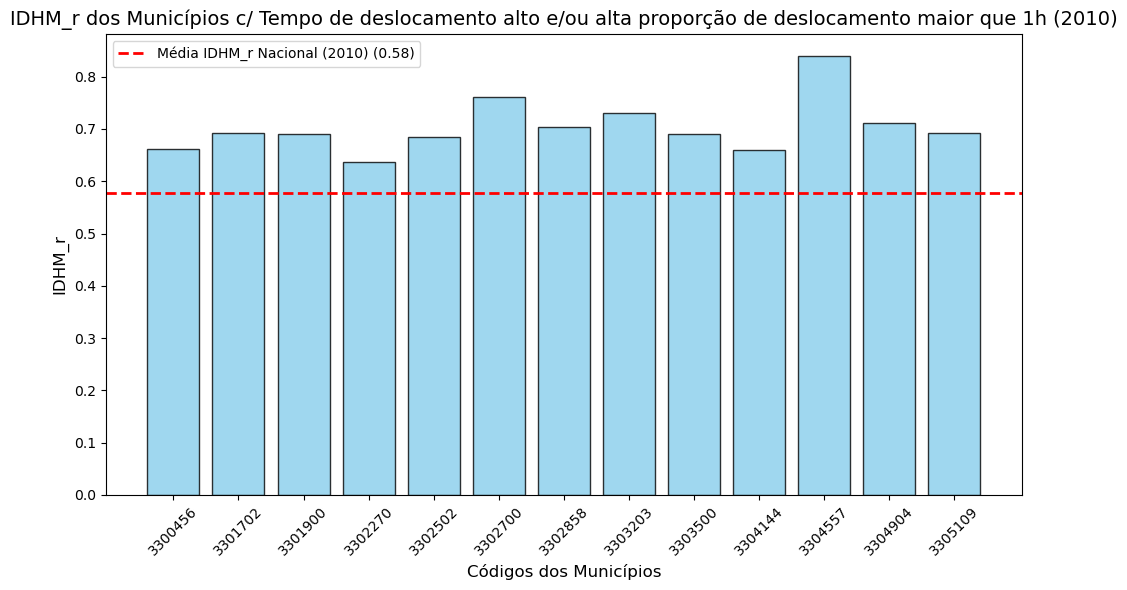

In [22]:
valores_idhm_r = dfADH2010_filtrado["idhm_r"]

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, valores_idhm_r, color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_idhm_r_2010, color='red', linestyle='--', linewidth=2, label=f"Média IDHM_r Nacional (2010) ({media_idhm_r_2010:.2f})")

# Configurações do gráfico
plt.title("IDHM_r dos Municípios c/ Tempo de deslocamento alto e/ou alta proporção de deslocamento maior que 1h (2010)", fontsize=14)
plt.xlabel("Códigos dos Municípios", fontsize=12)
plt.ylabel("IDHM_r", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()


<div style="text-align: justify">
Surpreendentemente (p/ mim, ao menos), os municípios fluminenses com média alta de deslocamento e grande porcentagem de população com deslocamento médio superior a 1h tem IDHm_r superior à média nacional. Obviamente, devemos levar em consideração que o RJ é o 2o estado brasileiro mais rico, portanto, isso influencia na análise.<br>Para tentar contornar isso, vou tentar comparar com a média do RJ.
</div>

In [25]:
dfADHUF = bd.read_sql(
    "SELECT * FROM `basedosdados.mundo_onu_adh.uf`",
    billing_project_id="tarefa-analytica-1")

Downloading: 100%|██████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 116.02rows/s]


In [27]:
dfADHUF

,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1991,AC,63.72,4.86,41.85,50.63,90.47,85.84,69.37,3.11,...,NaN,NaN,NaN,NaN,0.228,0.154,0.402,0.176,0.645,0.574
1,1991,AL,58.10,4.12,74.50,94.68,80.75,80.36,60.74,4.41,...,NaN,NaN,NaN,NaN,0.198,0.163,0.370,0.174,0.552,0.527
2,1991,AM,63.67,4.50,50.36,61.49,86.67,84.36,69.86,2.73,...,NaN,NaN,NaN,NaN,0.282,0.174,0.430,0.204,0.645,0.605
3,1991,AP,65.05,4.72,43.72,54.31,92.24,86.60,72.03,2.59,...,NaN,NaN,NaN,NaN,0.319,0.226,0.472,0.254,0.668,0.620
4,1991,BA,59.94,3.66,70.87,90.74,80.06,82.58,62.80,4.78,...,NaN,NaN,NaN,NaN,0.206,0.171,0.386,0.182,0.582,0.543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2010,RS,75.38,1.76,12.38,14.29,43.18,94.43,84.16,9.26,...,9327696.0,861658.0,531136.0,7934902.0,0.563,0.686,0.746,0.642,0.840,0.769
77,2010,SC,76.61,1.71,11.54,13.38,40.34,94.98,85.72,6.89,...,5404884.0,519558.0,326770.0,4558556.0,0.589,0.759,0.774,0.697,0.860,0.773
78,2010,SE,71.84,1.95,22.22,24.04,49.34,94.81,84.88,6.14,...,1720016.0,208209.0,125881.0,1385926.0,0.469,0.612,0.665,0.560,0.781,0.672
79,2010,SP,75.69,1.66,13.86,15.85,41.53,94.80,84.30,7.82,...,35723254.0,3325558.0,1989525.0,30408172.0,0.629,0.768,0.783,0.719,0.845,0.789


In [29]:
dfADHRJ2010 = dfADHUF[(dfADHUF["ano"] == 2010) & 
    (dfADHUF["sigla_uf"] == "RJ")
]
dfADHRJ2010

,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
72,2010,RJ,75.1,1.68,14.15,16.33,43.07,92.57,82.28,8.91,...,13908173.0,1305109.0,771099.0,11831965.0,0.647,0.689,0.761,0.675,0.835,0.782


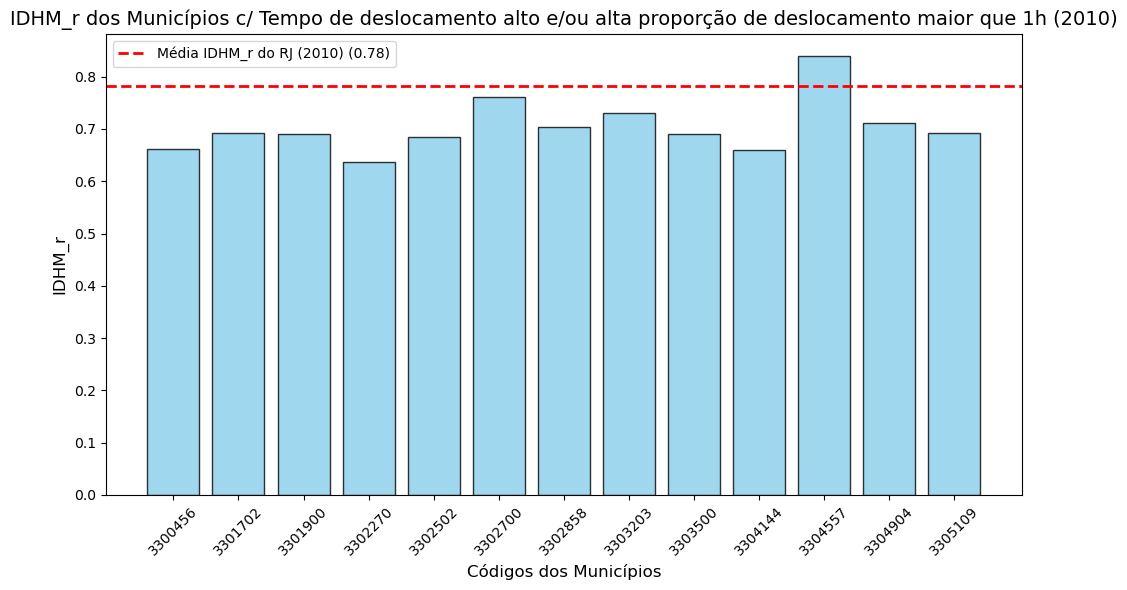

In [31]:
# Média do IDH de renda, do estado do RJ, no ano de 2010.
idhm_r_RJ = float(dfADHRJ2010["idhm_r"])

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, valores_idhm_r, color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=idhm_r_RJ, color='red', linestyle='--', linewidth=2, label=f"Média IDHM_r do RJ (2010) ({idhm_r_RJ:.2f})")

# Configurações do gráfico
plt.title("IDHM_r dos Municípios c/ Tempo de deslocamento alto e/ou alta proporção de deslocamento maior que 1h (2010)", fontsize=14)
plt.xlabel("Códigos dos Municípios", fontsize=12)
plt.ylabel("IDHM_r", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

<div style="text-align: justify">
Minha análise estava certa!<br>
Podemos ver que quase todos os municípios com alto tempo de deslocamento estão abaixo do IDH médio de renda estadual. Curiosamente, o único município que está acima da média é a capital (Rio de Janeiro).<Br>
<br>
No entanto, para confirmar isso, pegarei os dados dos municípios com menor tempo de deslocamento e/ou menor proporção de população que se desloca por mais de 1h.
</div>

In [34]:
# Crio um DataFrame com os municípios com tempo médio > média do tempo OU com proporção > média de proporção
dfMenorTempoPropRJ = dfRJ[
    (dfRJ["tempo_medio_deslocamento"] < mediaTempoDeslocamentoRJ) |
    (dfRJ["prop_deslocamento_acima_1_hora"] < mediaPropRJ)
]

# Obtenho os códigos dos municípios com tempo médio > média ou proporção > média
codigosMunicipiosMenorTempoProp = dfMenorTempoPropRJ["id_municipio"].tolist()

codigosMunicipiosMenorTempoProp = [
    codigo for codigo in codigosMunicipiosMenorTempoProp 
    if codigo not in codigosMunicipiosMaiorTempoProp
]

# Encontra a interseção entre as duas listas
intersecao = set(codigosMunicipiosMenorTempoProp) & set(codigosMunicipiosMaiorTempoProp)

# Verifica se a interseção não está vazia
if intersecao:
    print(f"Ainda existem elementos em comum: {list(intersecao)}")
else:
    print("Não há mais elementos em comum.")

print("Códigos dos municípios com tempo médio de deslocamento ou proporção abaixo da média:")
print(codigosMunicipiosMenorTempoProp)

# Filtra o DataFrame para ano 2010 e municípios presentes em 'codigosMunicipiosMenorTempoProp'
dfADH2010_filtrado2 = dfADH2010[
    (dfADH2010["ano"] == 2010) & 
    (dfADH2010["id_municipio"].isin(codigosMunicipiosMenorTempoProp))
]

# Exibe o DataFrame filtrado
dfADH2010_filtrado2

Não há mais elementos em comum.
Códigos dos municípios com tempo médio de deslocamento ou proporção abaixo da média:
['3300803', '3301850', '3302007', '3303302', '3303609', '3304300', '3305554', '3305752']


,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
14316,2010,3300803,74.01,1.51,16.43,18.48,44.16,92.00,81.10,8.03,...,46837.0,4839.0,2743.0,39256.0,0.515,0.653,0.700,0.603,0.817,0.695
14330,2010,3301850,73.69,2.33,16.72,18.81,45.88,91.74,80.55,6.71,...,43568.0,4791.0,2967.0,35810.0,0.521,0.651,0.698,0.604,0.812,0.692
14333,2010,3302007,73.84,2.09,15.70,17.66,44.05,91.70,80.48,6.08,...,92462.0,10207.0,5717.0,76538.0,0.575,0.672,0.715,0.638,0.814,0.703
14351,2010,3303302,76.23,1.41,12.91,14.52,40.54,93.43,84.14,12.17,...,437702.0,31430.0,19447.0,386825.0,0.794,0.762,0.837,0.773,0.854,0.887
14354,2010,3303609,73.73,1.30,15.90,17.89,36.24,91.62,80.31,8.15,...,42143.0,3800.0,2510.0,35834.0,0.597,0.704,0.720,0.666,0.812,0.689
14367,2010,3304300,74.16,1.53,15.20,17.10,43.16,91.93,80.95,8.23,...,48316.0,4854.0,2971.0,40491.0,0.525,0.673,0.710,0.620,0.819,0.705
14385,2010,3305554,73.30,1.77,16.50,18.56,43.63,91.31,79.67,6.75,...,66815.0,7234.0,4449.0,55132.0,0.572,0.690,0.713,0.648,0.805,0.695
14388,2010,3305752,72.55,2.02,17.70,19.91,45.02,90.75,78.54,7.25,...,26161.0,2798.0,1499.0,21864.0,0.409,0.634,0.654,0.548,0.793,0.644


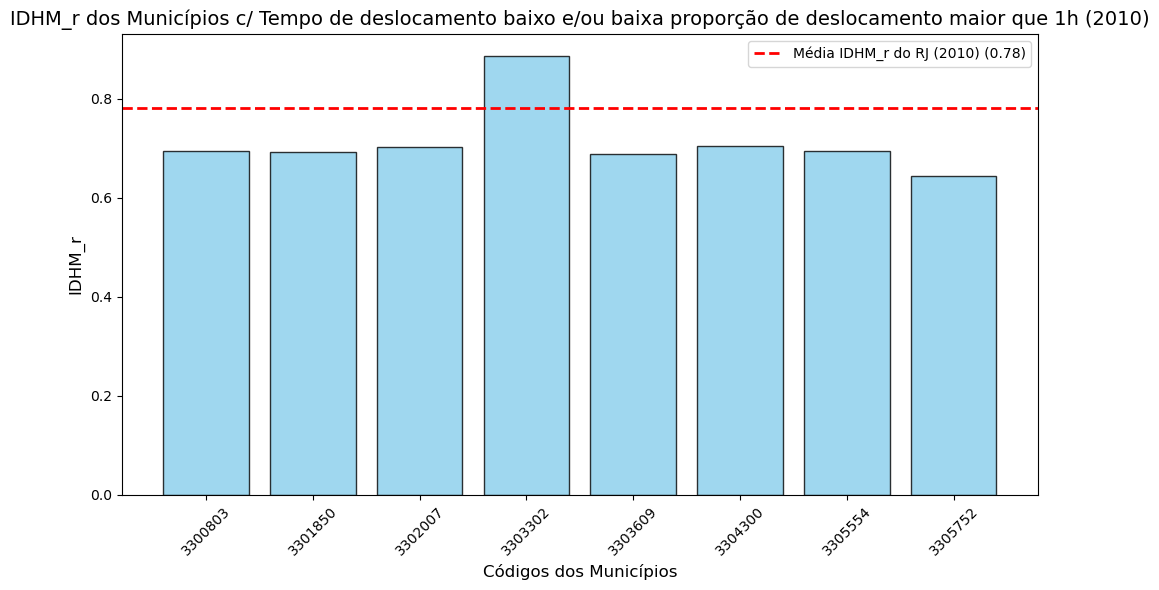

In [36]:
# Lista dos IDHm_r's dos municípios com baixo tempo de deslocamento/baixa proporção.
valores_idhm_r_baixos = dfADH2010_filtrado2["idhm_r"]

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, valores_idhm_r_baixos, color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=idhm_r_RJ, color='red', linestyle='--', linewidth=2, label=f"Média IDHM_r do RJ (2010) ({idhm_r_RJ:.2f})")

# Configurações do gráfico
plt.title("IDHM_r dos Municípios c/ Tempo de deslocamento baixo e/ou baixa proporção de deslocamento maior que 1h (2010)", fontsize=14)
plt.xlabel("Códigos dos Municípios", fontsize=12)
plt.ylabel("IDHM_r", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [ ]:
# Lista dos IDHm_r's dos municípios com baixo tempo de deslocamento/baixa proporção.
valores_idhm_r_baixos = dfADH2010_filtrado2["idhm_r"]

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, valores_idhm_r_baixos, color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=idhm_r_RJ, color='red', linestyle='--', linewidth=2, label=f"Média IDHM_r do RJ (2010) ({idhm_r_RJ:.2f})")

# Configurações do gráfico
plt.title("IDHM_r dos Municípios c/ Tempo de deslocamento baixo e/ou baixa proporção de deslocamento maior que 1h (2010)", fontsize=14)
plt.xlabel("Códigos dos Municípios", fontsize=12)
plt.ylabel("IDHM_r", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

<div style="text-align: justify">
C/ o gráfico acima, não fica tão clara uma correlação entre os dados. No entanto, vale lembrar que, especificamente no RJ, existe uma distribuição desigual de geração e distribuição de renda entre os municípios, com grande parte das atividades de geração de renda concentradas na capital.<br>
</div>

In [196]:
media_idhm_r_piores = (
    dfADH2010[
        dfADH2010["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["idhm_r"].mean()
)
print(f"O IDH Municipal de Renda médio dos municípios c/ pior mobilidade urbana é de {media_idhm_r_piores:.3f}.\n")


media_idhm_r_melhores = (
    dfADH2010[
        dfADH2010["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["idhm_r"].mean()
)
print(f"O IDH Municipal de Renda médio dos municípios c/ melhor mobilidade urbana é de {media_idhm_r_melhores:.3f}.\n")


O IDH Municipal de Renda médio dos municípios c/ pior mobilidade urbana é de 0.657.

O IDH Municipal de Renda médio dos municípios c/ melhor mobilidade urbana é de 0.665.



Diferença sutil. Sem relação.

## Analisando dados do município do RJ

<div style="text-align: justify">
P/ o município do Rio de Janeiro, utilizarei os dados do Índice de Progresso Social, do Instituto Pereira Passos, que fornece dados mais detalhados sobre os bairros.<br>
No entanto, neste dataset não temos nenhum tipo de IDH, sendo assim, o parâmetro de qualidade de vida a ser utilizado será o próprio Índice de Progresso Social. Ou seja, na análise dos bairros cariocas, não poderei relacionar diretamente à renda, portanto, a pergunta que quero responder é: <strong>Existe uma correlação entre a qualidade de vida e o tempo de deslocamento médio diário no trânsito?<br></strong>
</div>

In [41]:
bd.get_table_columns(
    dataset_id='basedosdados.br_rj_rio_de_janeiro_ipp_ips',
    table_id='indicadores'
)


name: 
	ano 
field_type: 
	INTEGER 
description: 
	Ano 
-----------------------------------------------------------------------------------------------
name: 
	regiao_administrativa 
field_type: 
	STRING 
description: 
	Região Administrativa 
-----------------------------------------------------------------------------------------------
name: 
	mortalidade_infancia 
field_type: 
	FLOAT 
description: 
	Óbitos de crianças de 0 a 5 anos por 1.000 nascidos vivos. O número de óbitos foi 
por meio do Sistema de Informações sobre Mortalidade do Sistema de Informações em 
da Secretaria Municipal de Saúde do Município do Rio de Janeiro (SMS-RJ). O número 
nascidos vivos foi obtido por meio do Sistema de Informação de Nascidos Vivos, da 
base de dados da SMS-RJ. 
-----------------------------------------------------------------------------------------------
name: 
	prop_baixo_peso_nascer 
field_type: 
	FLOAT 
description: 
	Proporção de nascidos vivos que, na primeira pesagem (preferencialmente

In [43]:
dfIPS_indicadores = bd.read_sql(
    "SELECT * FROM `basedosdados.br_rj_rio_de_janeiro_ipp_ips.indicadores`",
    billing_project_id="tarefa-analytica-1"
)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 207.88rows/s]


In [45]:
# Filtro para pegar os dados apenas de 2020:
dfIPS_indicadores_2020 = dfIPS_indicadores[dfIPS_indicadores["ano"]==2020]

# Calculando o tempo médio de deslocamento diário no município do RJ.
mediaTempoMedioDeslocamentoIPS = dfIPS_indicadores_2020["tempo_medio_deslocamento"].mean()
print(f"Tempo médio de deslocamento no municípios do RJ é de {mediaTempoMedioDeslocamentoIPS:.2f} min.\n")  # A média encontrada é de 28.83 min.

# Calculando a proporção de pessoas que possuem fácil acesso à infraestrutura de mobilidade urbana (< 1km).
mediaPropMobilidadeUrbanaIPS = sum(dfIPS_indicadores_2020["prop_mobilidade_urbana"])/len(dfIPS_indicadores["prop_mobilidade_urbana"])
print(f"Aproximadamente, {mediaPropMobilidadeUrbanaIPS:.2f}% da população carioca têm fácil acesso às estruturas de mobilidade urbana (raio < 1km).\n") # A média encontrada é de 52.06%.

Tempo médio de deslocamento no municípios do RJ é de 28.83 min.

Aproximadamente, 20.41% da população carioca têm fácil acesso às estruturas de mobilidade urbana (raio < 1km).



In [47]:
# Filtro o dataset para pegar os bairros com piores números de deslocamento ou mobilidade urbana.
dfIPS_indicadores_maiorTempo = dfIPS_indicadores[((dfIPS_indicadores["tempo_medio_deslocamento"]>mediaTempoMedioDeslocamentoIPS) | (dfIPS_indicadores["prop_mobilidade_urbana"]>mediaPropMobilidadeUrbanaIPS)) & (dfIPS_indicadores["ano"]==2020)]

# Listo os nomes destes bairros.
nomesBairrosMaiorTempoProp = dfIPS_indicadores_maiorTempo["regiao_administrativa"].tolist()

# Filtro o dataset para pegar os bairros com melhores números de deslocamento ou mobilidade urbana.
dfIPS_indicadores_menorTempo = dfIPS_indicadores[((dfIPS_indicadores["tempo_medio_deslocamento"] <= mediaTempoMedioDeslocamentoIPS) | (dfIPS_indicadores["prop_mobilidade_urbana"] <= mediaPropMobilidadeUrbanaIPS)) & (dfIPS_indicadores["ano"] == 2020)]


In [49]:
dfIPS_dimensoes_componentes = bd.read_sql(
    "SELECT * FROM `basedosdados.br_rj_rio_de_janeiro_ipp_ips.dimensoes_componentes`",
    billing_project_id="tarefa-analytica-1"
)

Downloading: 100%|██████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 262.91rows/s]


In [50]:
# Calculando a média do IPS:
mediaIPS = sum(dfIPS_dimensoes_componentes["ips_geral"])/len(dfIPS_dimensoes_componentes["ips_geral"])
print(f"O Índice de Progresso Social médio do município do RJ é de {mediaIPS:.2f}.\n")  # A média encontrada é de 58.59.

O Índice de Progresso Social médio do município do RJ é de 58.59.



A média do IPS carioca, em 2020, era de 58.59.



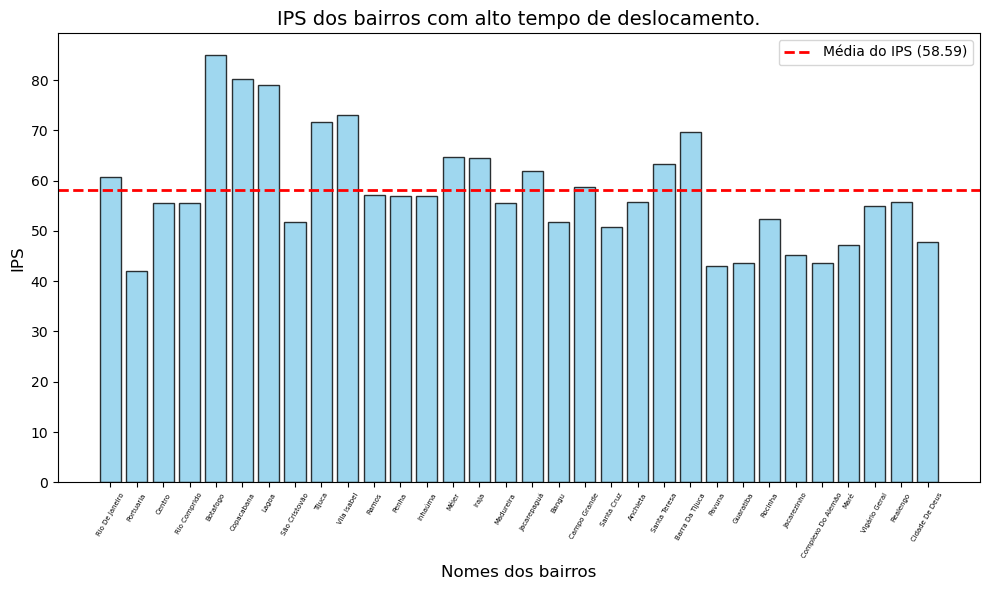

In [198]:
# Faço uma lista com os IPS's dos bairros com piores números de tempo e/ou proporção:
lista_ips = (dfIPS_dimensoes_componentes[(dfIPS_dimensoes_componentes["regiao_administrativa"].isin(nomesBairrosMaiorTempoProp)) & (dfIPS_dimensoes_componentes["ano"]==2020)])["ips_geral"]
lista_ips_unicos = lista_ips.drop_duplicates()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nomesBairrosMaiorTempoProp, lista_ips_unicos, color='skyblue', edgecolor='black', alpha=0.8)

# Calculo a média do IPS carioca p/ 2020:
dfIPS_dimensoes_componentes_2020 = dfIPS_dimensoes_componentes[dfIPS_dimensoes_componentes["ano"]==2020]
media_IPS_2020 = sum(dfIPS_dimensoes_componentes_2020["ips_geral"])/len(dfIPS_dimensoes_componentes_2020["ips_geral"])
print(f"A média do IPS carioca, em 2020, era de {mediaIPS:.2f}.\n")

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_IPS_2020, color='red', linestyle='--', linewidth=2, label=f"Média do IPS ({mediaIPS:.2f})")

# Configurações do gráfico
plt.title("IPS dos bairros com alto tempo de deslocamento.", fontsize=14)
plt.xlabel("Nomes dos bairros", fontsize=12)
plt.ylabel("IPS", fontsize=12)
plt.xticks(ticks=range(len(nomesBairrosMaiorTempoProp)), labels=nomesBairrosMaiorTempoProp, rotation=60, fontsize=5)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

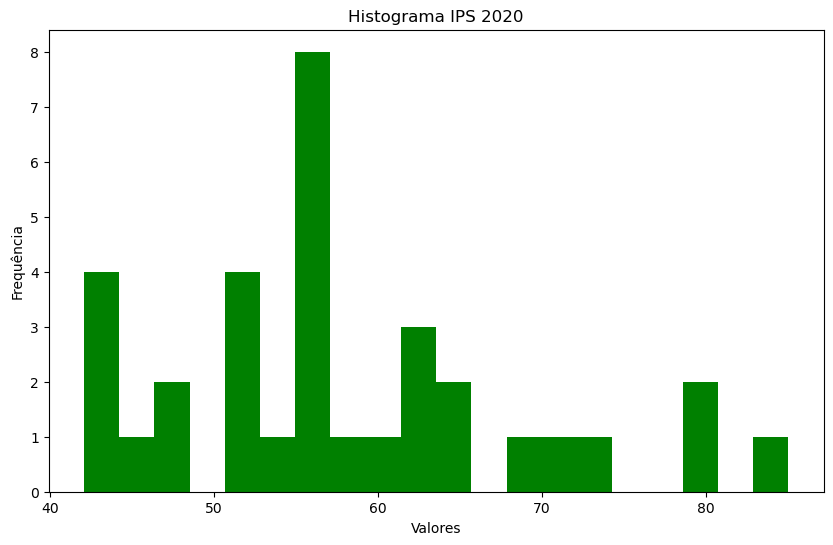

In [190]:
# Fazendo um histograma dos IPS cariocas:
plt.figure(figsize=(10, 6))
plt.hist(dfIPS_dimensoes_componentes_2020["ips_geral"], bins=20, label='IPS', color='green')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma IPS 2020")
plt.show()

<div style="text-align: justify">
Como podemos perceber pelo gráfico acima, dos 33 bairros cariocas com tempo médio de deslocamento acima da média carioca, somente 12 estão acima da média do IPS, ou seja, os bairros com pior infraestrutura de trânsito possuem Índice de Progresso Social menor, o que corrobora para a tese de que a <strong>qualidade de vida e infraestrutura de trânsito são diretamente proporcionais</strong>.<br>
</div> 

## Uma segunda pergunta: A infraestrutura de transporte público influencia na educação da população?

<div style="text-align: justify">
Essa é a segunda pergunta que quero responder. Eu, particularmente, acredito que as regiões com pior infraestrutura de trânsito terão escolaridade abaixo da média, principalmente quando comparadas às regiões com boa infraestrutura. Acredito nisso pois é muito difícil, para a população periférica, acessar educação de qualidade. Grande parte das universidades de prestígio estão nas áreas centrais, nos estados do Sudeste, prejudicando aqueles que vivem em cidades distantes destes grandes centros. <br>
Falando por mim, é muito difícil dormir bem, ter atividades de lazer, cuidar de assuntos pessoais, entre outros, por morar tão longe da UFRJ
</div>

#### Por questões de comodidade, começarei analisando os dados do município do Rio de Janeiro, que estão todos em um único dataset.

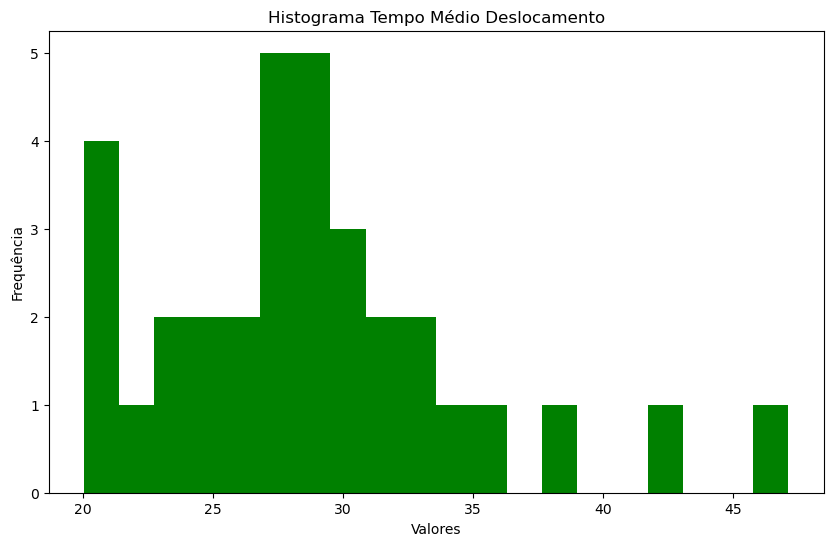

In [59]:
# Fazendo um histograma da proporção de tempo de deslocamento no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_indicadores_2020["tempo_medio_deslocamento"], bins=20, label='Proporção de alfabetizados', color='green')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Tempo Médio Deslocamento")
plt.show()

Percebemos, a partir do gráfico acima, que grande parte da população não perde tanto tempo no trânsito no Rio de Janeiro, o que é um dado surpreendente.

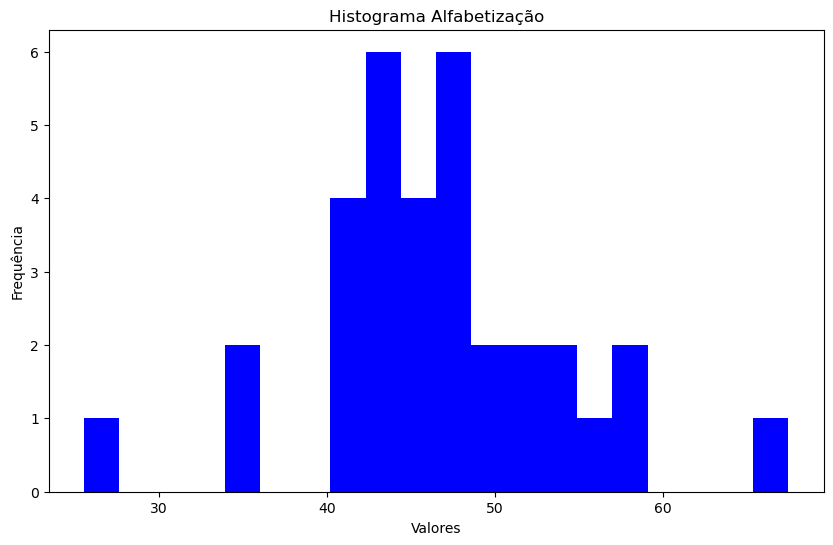

In [62]:
# Fazendo um histograma da proporção de alfabetizados no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_indicadores_2020["prop_alfabetizacao"], bins=20, label='Proporção de alfabetizados', color='blue')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Alfabetização")
plt.show()

<div style="text-align: justify">Como podemos ver no histograma acima, não temos tanta desigualdade em relação a alfabetização, o que não necessariamente significa que isso é bom. Analisando o gráfico, vemos que a população se distribui, em grande parte, ao redor dos 40 a 50 por cento de alfabetizados, o que não é uma taxa satisfatória.</div>

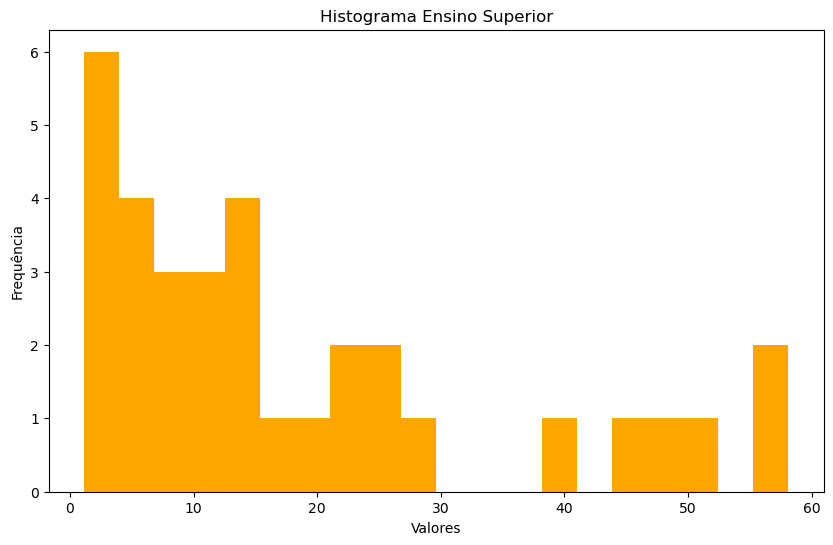

In [65]:
# Fazendo um histograma da proporção de formados no ensino superior no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_indicadores_2020["prop_pessoas_ensino_superior"], bins=20, label='Proporção de formados no ensino superior', color='orange')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Ensino Superior")
plt.show()

Percebemos, pelo histograma acima, que temos poucas pessoas com ensino superior. Grande parte dos bairros possui menos de 30% da população formada no ensino superior.

In [68]:
dfIPS_dimensoes_componentes_2020 = dfIPS_dimensoes_componentes[dfIPS_dimensoes_componentes["ano"]==2020]

# Fazendo alguns outros histogramas.

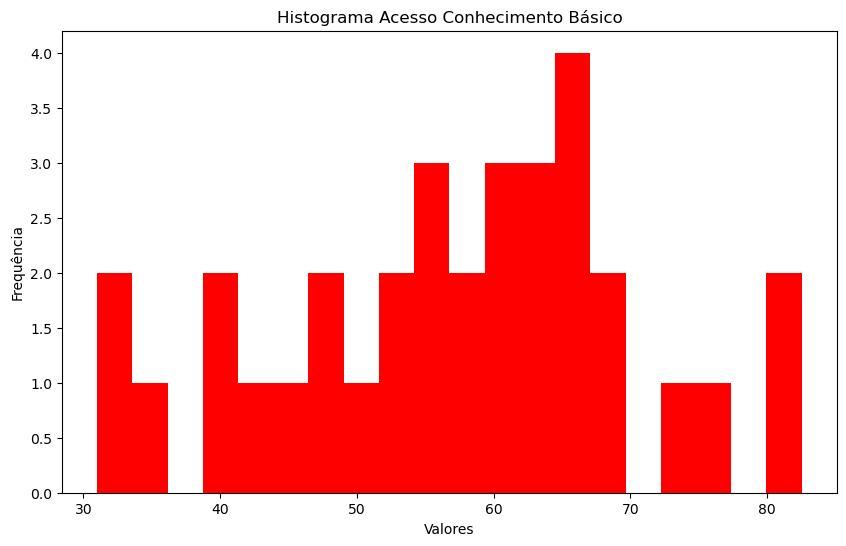

In [70]:
# Fazendo um histograma da proporção de pessoas c/ acesso ao conhecimento básico no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_dimensoes_componentes_2020["acesso_conhecimento_basico"], bins=20, label='Proporção de pessoas c/ acesso ao conhecimento básico', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Acesso Conhecimento Básico")
plt.show()

Grande parte da população possui acesso ao conhecimento básico.

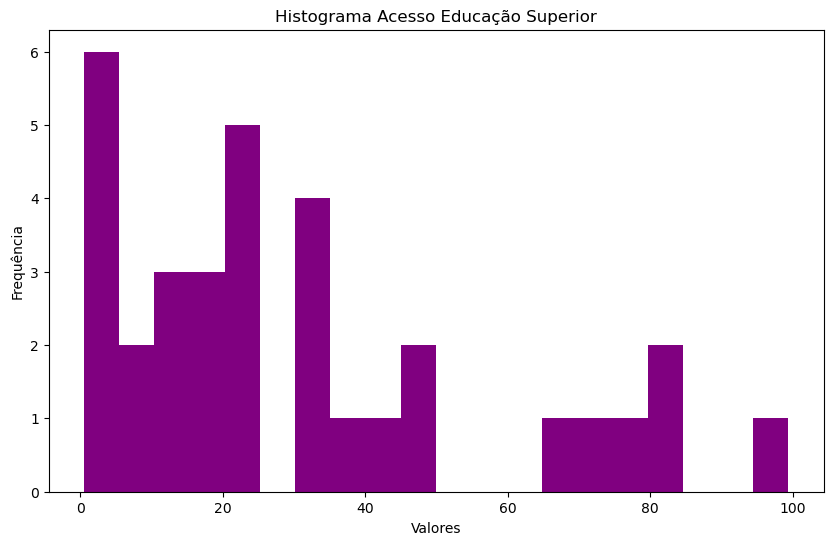

In [73]:
# Fazendo um histograma da proporção de pessoas c/ acesso a educação superior no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_dimensoes_componentes_2020["acesso_educacao_superior"], bins=20, label='Proporção de pessoas c/ acesso a educação superior', color='purple')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Acesso Educação Superior")
plt.show()

Percebemos que a educação superior é disponível p/ poucos.

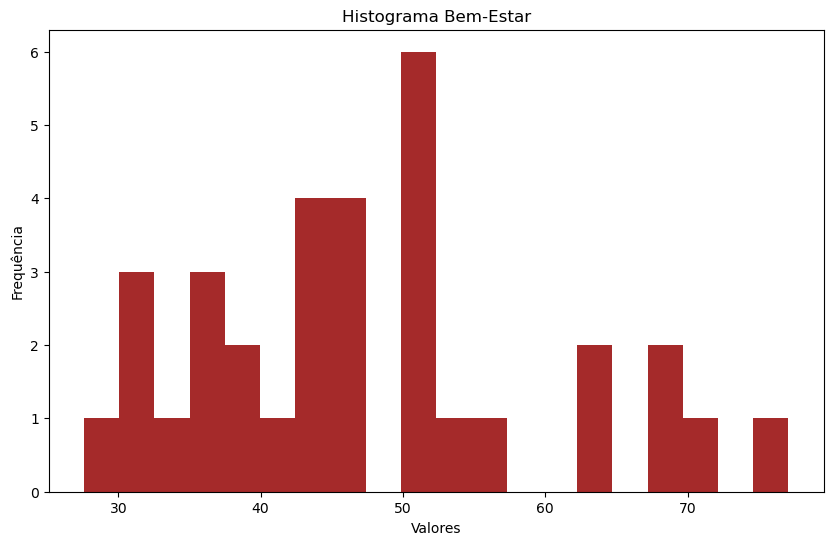

In [76]:
# Fazendo um histograma da proporção de pessoas c/ acesso a educação superior no município do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(dfIPS_dimensoes_componentes_2020["fundamentos_bem_estar_nota_dimensao"], bins=20, label='Proporção de pessoas c/ determinado bem-estar', color='brown')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Bem-Estar")
plt.show()

Percebemos que grande parte da população carioca não possui grande bem-estar, ou seja, não possui boa qualidade de vida.

#### Apesar disso tudo, não consegui, ainda, achar uma relação entre a educação e a baixa infraestrutura de transporte, principalmente por conta do histograma de tempo de deslocamento ter indicado uma grande concentração de baixos valores.

In [80]:
# Farei médias dos índices educacionais mais relevantes dos bairros cariocas:

# Média Ensino Superior:
media_prop_ensino_superior_RJ_2020 = sum(dfIPS_indicadores_2020["prop_pessoas_ensino_superior"])/len(dfIPS_indicadores_2020["prop_pessoas_ensino_superior"])
print(f"A proporção média de graduados no município do RJ é de {media_prop_ensino_superior_RJ_2020:.2f}%.\n")

# Média Acesso Ensino Superior:
media_acesso_ensino_superior_RJ_2020 = sum(dfIPS_dimensoes_componentes_2020["acesso_educacao_superior"])/len(dfIPS_dimensoes_componentes_2020["acesso_educacao_superior"])
print(f"A proporção média de acesso à educação superior no município do RJ é de {media_acesso_ensino_superior_RJ_2020:.2f}%.\n")

# Média Alfabetização:
media_alfabetizacao_RJ_2020 = sum(dfIPS_indicadores_2020["prop_alfabetizacao"])/len(dfIPS_indicadores_2020["prop_alfabetizacao"])
print(f"A proporção média de alfabetizaçào no município do RJ é de {media_alfabetizacao_RJ_2020:.2f}%.\n")

A proporção média de graduados no município do RJ é de 18.49%.

A proporção média de acesso à educação superior no município do RJ é de 31.21%.

A proporção média de alfabetizaçào no município do RJ é de 46.76%.



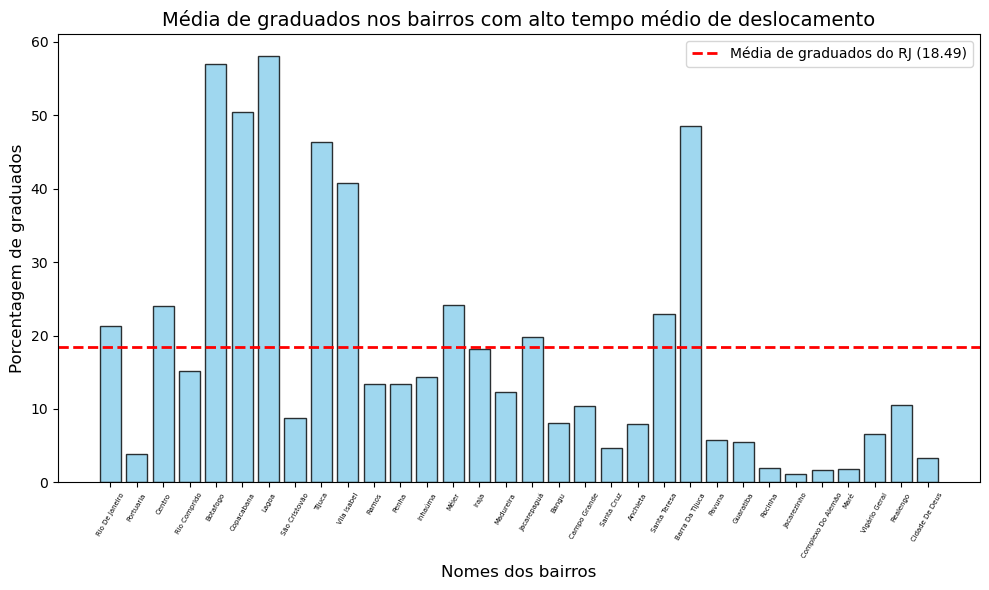

In [82]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nomesBairrosMaiorTempoProp, dfIPS_indicadores_2020[dfIPS_indicadores_2020["regiao_administrativa"].isin(nomesBairrosMaiorTempoProp)]["prop_pessoas_ensino_superior"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_prop_ensino_superior_RJ_2020, color='red', linestyle='--', linewidth=2, label=f"Média de graduados do RJ ({media_prop_ensino_superior_RJ_2020:.2f})")

# Configurações do gráfico
plt.title("Média de graduados nos bairros com alto tempo médio de deslocamento", fontsize=14)
plt.xlabel("Nomes dos bairros", fontsize=12)
plt.ylabel("Porcentagem de graduados", fontsize=12)
plt.xticks(ticks=range(len(nomesBairrosMaiorTempoProp)), labels=nomesBairrosMaiorTempoProp, rotation=60, fontsize=5)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

De todos os 33 bairros com desempenho ruim nos números de transporte público, somente 12 estão acima da média de graduados municipal. Por coincidência, se analisarmos os bairros que estão acima, são bairros historicamente privilegiados, como os bairros da Zona Sul e a Barra da Tijuca.

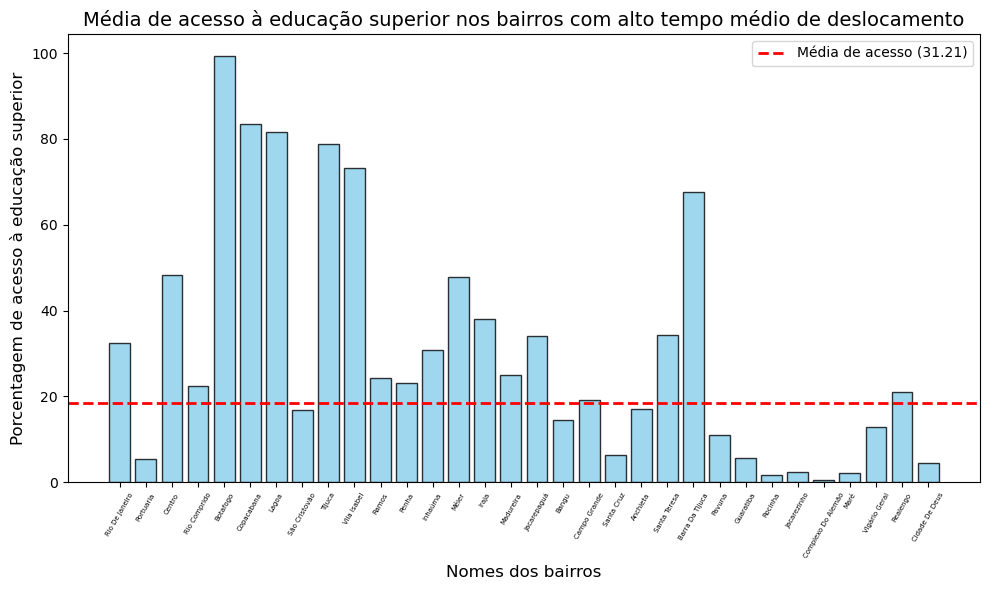

In [204]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nomesBairrosMaiorTempoProp, dfIPS_dimensoes_componentes_2020[dfIPS_dimensoes_componentes_2020["regiao_administrativa"].isin(nomesBairrosMaiorTempoProp)]["acesso_educacao_superior"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_prop_ensino_superior_RJ_2020, color='red', linestyle='--', linewidth=2, label=f"Média de acesso ({media_acesso_ensino_superior_RJ_2020:.2f})")

# Configurações do gráfico
plt.title("Média de acesso à educação superior nos bairros com alto tempo médio de deslocamento", fontsize=14)
plt.xlabel("Nomes dos bairros", fontsize=12)
plt.ylabel("Porcentagem de acesso à educação superior", fontsize=12)
plt.xticks(ticks=range(len(nomesBairrosMaiorTempoProp)), labels=nomesBairrosMaiorTempoProp, rotation=60, fontsize=5)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()


De todos os 33 bairros com desempenho ruim nos números de transporte público, 20 estão acima da média de graduados municipal. Nessa estatística, podemos ver que não há expressividade.

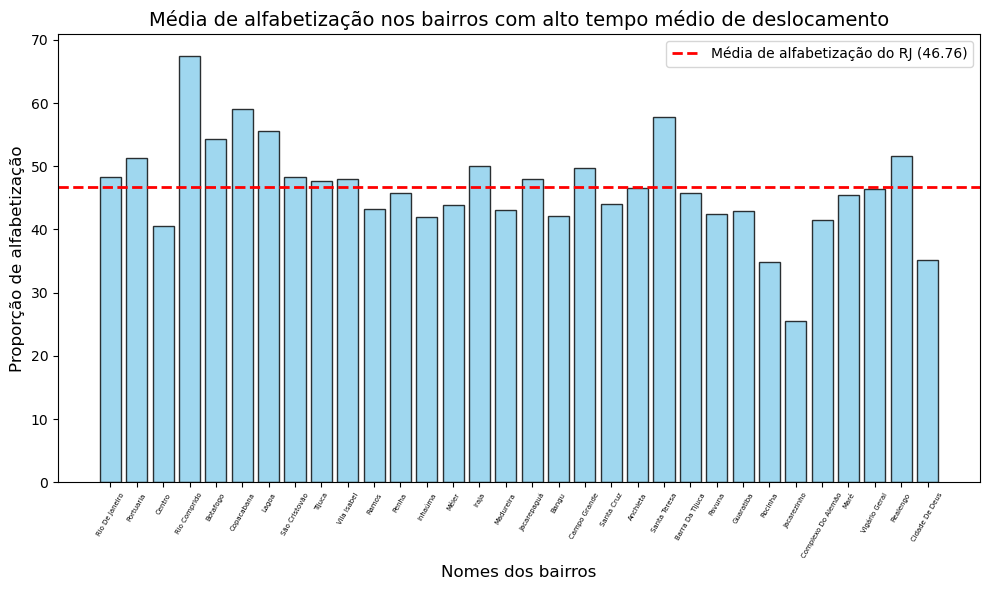

In [200]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nomesBairrosMaiorTempoProp, dfIPS_indicadores_2020[dfIPS_indicadores_2020["regiao_administrativa"].isin(nomesBairrosMaiorTempoProp)]["prop_alfabetizacao"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_alfabetizacao_RJ_2020, color='red', linestyle='--', linewidth=2, label=f"Média de alfabetização do RJ ({media_alfabetizacao_RJ_2020:.2f})")

# Configurações do gráfico
plt.title("Média de alfabetização nos bairros com alto tempo médio de deslocamento", fontsize=14)
plt.xlabel("Nomes dos bairros", fontsize=12)
plt.ylabel("Proporção de alfabetização", fontsize=12)
plt.xticks(ticks=range(len(nomesBairrosMaiorTempoProp)), labels=nomesBairrosMaiorTempoProp, rotation=60, fontsize=5)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Perceba que, dos 33 bairros, 15 estão acima da média, o que está de acordo com a taxa média de alfabetização. Portanto, podemos extrair disso que a educação básica não é tão afetada pela infraestrutura de trânsito, talvez porque a educação básica tenha mais suporte.

### Partindo agora para uma análise estadual

<div style="text-align: justify">
Começarei filtrando os dados do ADH, que contém diversos dados municipais de 2010, para começar. Como não possuo dados do tempo de deslocamento médio de todos os municípios fluminenses pelo Mobilidados (somente 21 de 33), restringirei os dados do ADH para estes municípios também.
</div>



In [93]:
# Filtrando o dataset do ADH, de 2010:
df_ADH_2010_RJ_filtrado = dfADH2010[(dfADH2010["ano"]==2010) & (dfADH2010["id_municipio"].isin(dfRJ["id_municipio"]))]

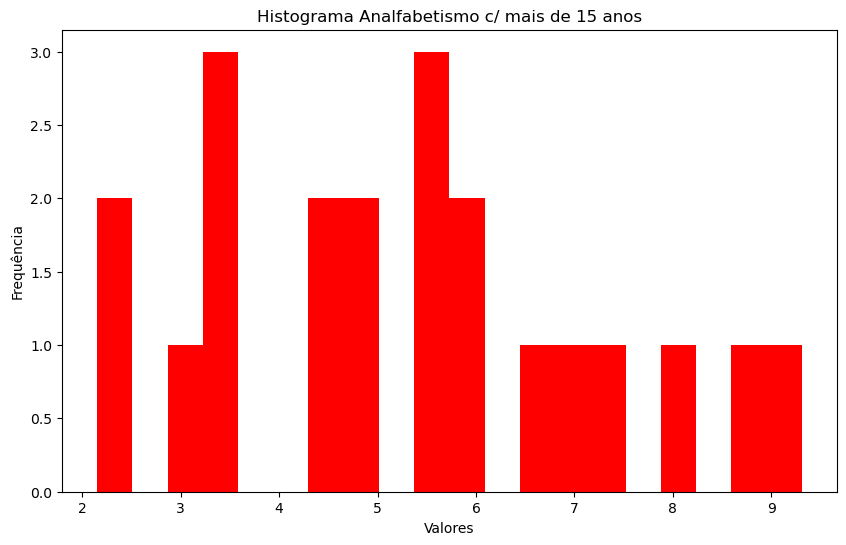

In [95]:
# Fazendo um histograma da proporção de pessoas analfabetas c/ mais de 15 anos de idade no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["taxa_analfabetismo_15_mais"], bins=20, label='Porcentagem de pessoas analfabetas c/ mais de 15 anos de idade', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Analfabetismo c/ mais de 15 anos")
plt.show()

Perceba que o histograma indica que as taxas são bem divididas. No entanto, porcentagens de analfabetismo entre 2% e 6% são mais comuns.

In [98]:
media_analfabetismo_15 = sum(df_ADH_2010_RJ_filtrado["taxa_analfabetismo_15_mais"])/len(df_ADH_2010_RJ_filtrado["taxa_analfabetismo_15_mais"])
print(f"A média da porcentagem de analfabetismo em pessoas c/ mais de 15 anos de idade no estado do RJ é de {media_analfabetismo_15:.2f}%.\n")

A média da porcentagem de analfabetismo em pessoas c/ mais de 15 anos de idade no estado do RJ é de 5.35%.



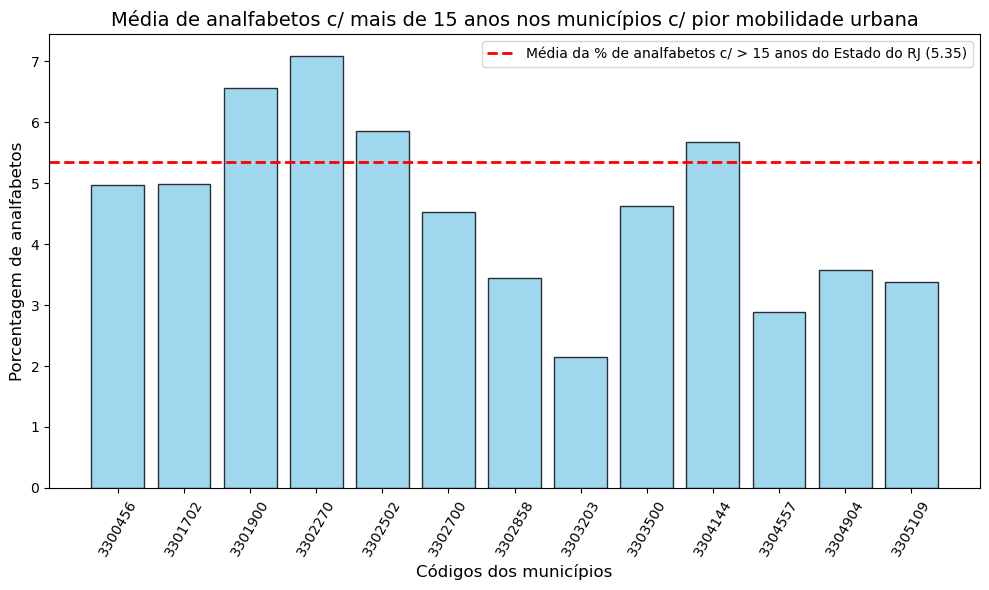

In [100]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["taxa_analfabetismo_15_mais"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_analfabetismo_15, color='red', linestyle='--', linewidth=2, label=f"Média da % de analfabetos c/ > 15 anos do Estado do RJ ({media_analfabetismo_15:.2f})")

# Configurações do gráfico
plt.title("Média de analfabetos c/ mais de 15 anos nos municípios c/ pior mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Porcentagem de analfabetos", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Perceba que, dos 13 municípios c/ estatísticas ruins de mobilidade urbana, somente 4 estão acima da média de analfabetismo. Portanto, não vejo uma relação grande assim.

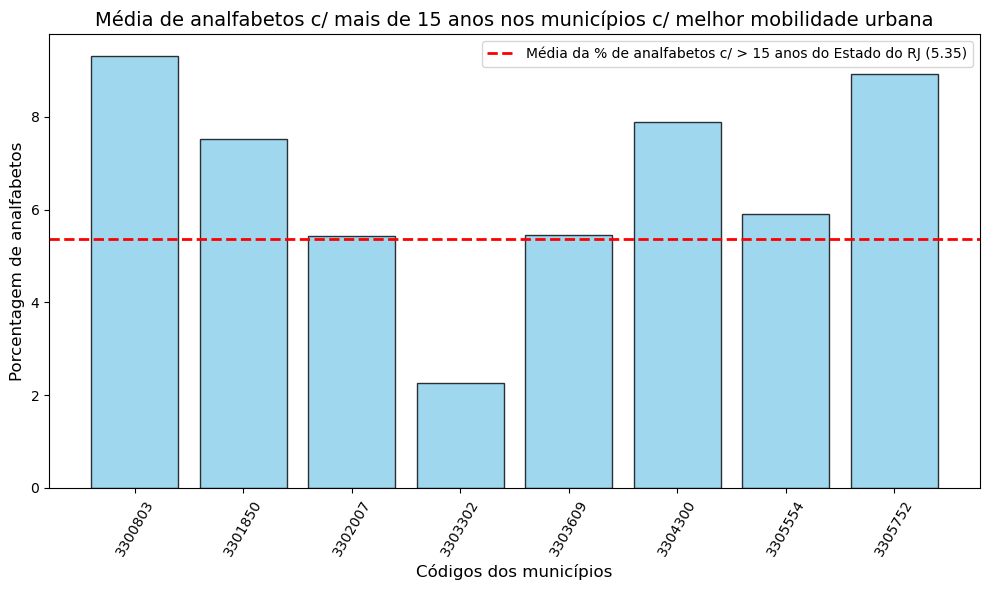

In [103]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["taxa_analfabetismo_15_mais"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_analfabetismo_15, color='red', linestyle='--', linewidth=2, label=f"Média da % de analfabetos c/ > 15 anos do Estado do RJ ({media_analfabetismo_15:.2f})")

# Configurações do gráfico
plt.title("Média de analfabetos c/ mais de 15 anos nos municípios c/ melhor mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Porcentagem de analfabetos", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [105]:
media_analfabetismo_15_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["taxa_analfabetismo_15_mais"].mean()
)
print(f"A porcentagem média de analfabetos c/ mais de 15 anos de idade nos municípios c/ pior mobilidade urbana é de {media_analfabetismo_15_piores:.3f}.\n")


media_analfabetismo_15_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["taxa_analfabetismo_15_mais"].mean()
)
print(f"A porcentagem média de analfabetos c/ mais de 15 anos de idade nos municípios c/ melhor mobilidade urbana é de {media_analfabetismo_15_melhores:.3f}.\n")

A porcentagem média de analfabetos c/ mais de 15 anos de idade nos municípios c/ pior mobilidade urbana é de 4.596.

A porcentagem média de analfabetos c/ mais de 15 anos de idade nos municípios c/ melhor mobilidade urbana é de 6.588.



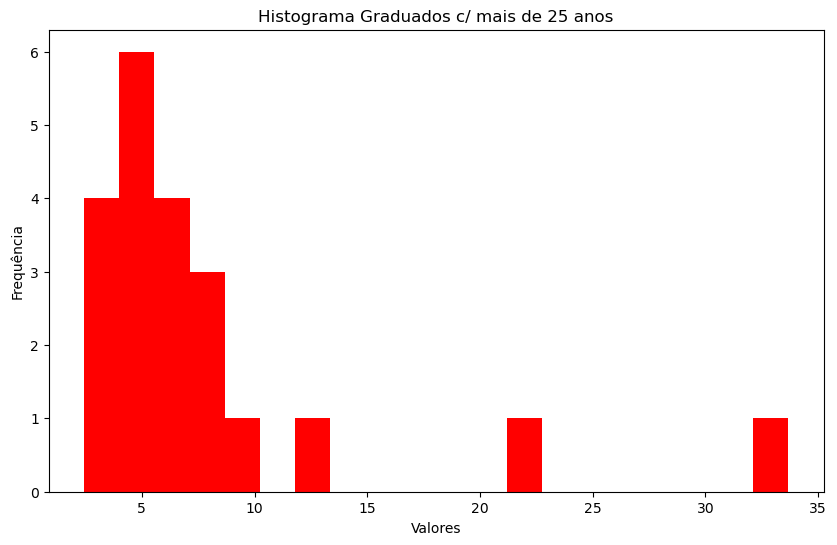

In [107]:
# Fazendo um histograma da proporção de pessoas graduadas c/ mais de 25 anos de idade no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["taxa_superior_25_mais"], bins=20, label='Porcentagem de pessoas graduadas c/ mais de 25 anos de idade', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Graduados c/ mais de 25 anos")
plt.show()

Grande parte dos municípios fluminenses possui baixa taxa de graduados c/ mais de 25 anos, ou seja, o 

In [110]:
media_superior_25 = sum(df_ADH_2010_RJ_filtrado["taxa_superior_25_mais"])/len(df_ADH_2010_RJ_filtrado["taxa_superior_25_mais"])
print(f"A média da porcentagem de pessoas com ensino superior completo e mais de 25 anos no Estado do RJ é de {media_superior_25:.2f}%.\n")

A média da porcentagem de pessoas com ensino superior completo e mais de 25 anos no Estado do RJ é de 8.14%.



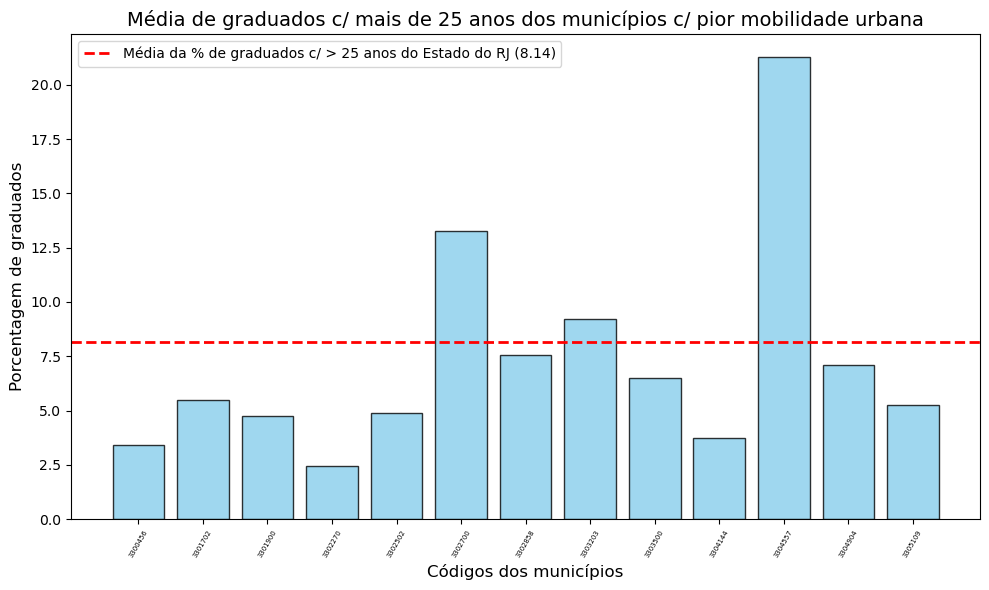

In [112]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["taxa_superior_25_mais"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_superior_25, color='red', linestyle='--', linewidth=2, label=f"Média da % de graduados c/ > 25 anos do Estado do RJ ({media_superior_25:.2f})")

# Configurações do gráfico
plt.title("Média de graduados c/ mais de 25 anos dos municípios c/ pior mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Porcentagem de graduados", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=5)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

<div style="text-align: justify">Mais uma vez, reforça a ideia de que a mobilidade urbana impacta mais no ensino superior. Perceba que, dos 13 municípios com mobilidade urbana ruim, somente três estão acima da média estadual de graduados c/ mais de 25 anos de idade.<br>
Para tirar dúvidas, vou comparar os dados dos municípios acima da média na mobilidade urbana.</div>

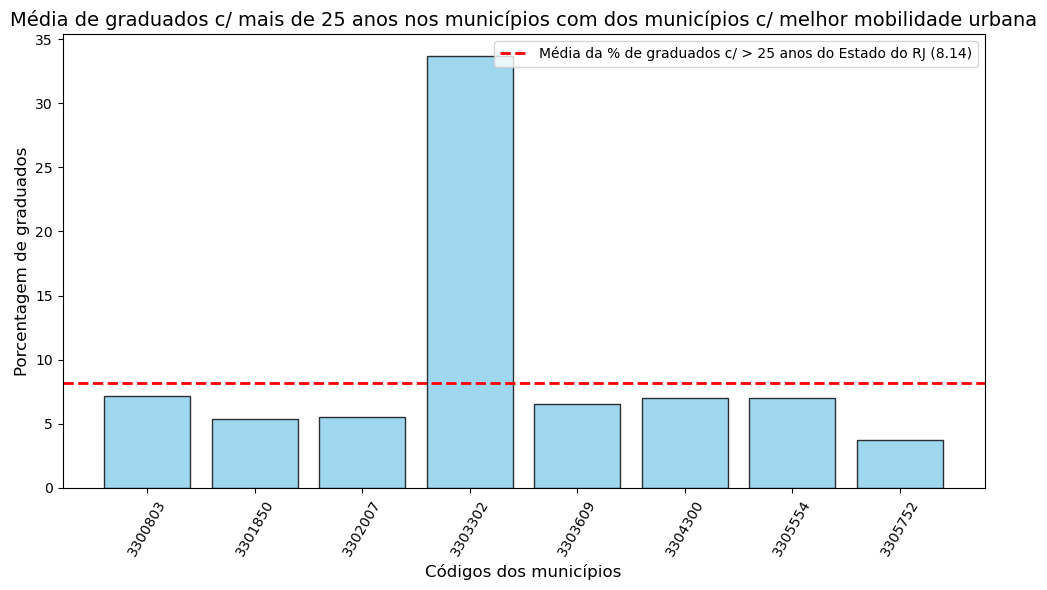

In [115]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["taxa_superior_25_mais"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_superior_25, color='red', linestyle='--', linewidth=2, label=f"Média da % de graduados c/ > 25 anos do Estado do RJ ({media_superior_25:.2f})")

# Configurações do gráfico
plt.title("Média de graduados c/ mais de 25 anos nos municípios com dos municípios c/ melhor mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Porcentagem de graduados", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Há uma ligeira melhora em comparação aos piores municípios. No entanto, não sei se é suficiente.

In [118]:
media_superior_25_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["taxa_superior_25_mais"].mean()
)
print(f"A porcentagem média de graduados c/ mais de 25 anos de idade nos municípios c/ pior mobilidade urbana é de {media_superior_25_piores:.3f}.\n")


media_superior_25_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["taxa_superior_25_mais"].mean()
)
print(f"A porcentagem média de graduados c/ mais de 25 anos de idade nos municípios c/ melhor mobilidade urbana é de {media_superior_25_melhores:.3f}.\n")

A porcentagem média de graduados c/ mais de 25 anos de idade nos municípios c/ pior mobilidade urbana é de 7.302.

A porcentagem média de graduados c/ mais de 25 anos de idade nos municípios c/ melhor mobilidade urbana é de 9.508.



Diferença mais expressiva, porém, ainda é pequena.

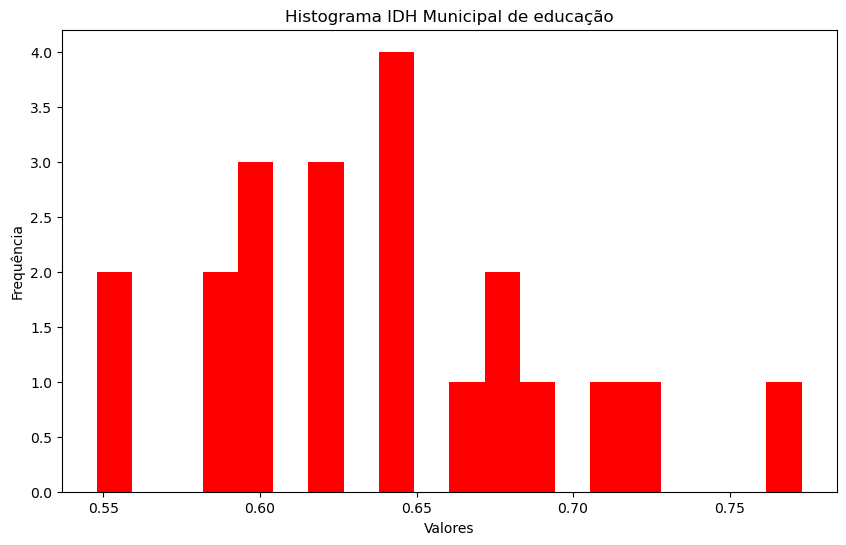

In [121]:
# Fazendo um histograma dos IDH municipais de educação no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["idhm_e"], bins=20, label='IDH municipal de educação', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma IDH Municipal de educação")
plt.show()

O IDHm_e está bem espalhado. No entanto, perbemos maior concentração em valores abaixo de 0.65.

In [124]:
media_idhm_e_RJ = sum(df_ADH_2010_RJ_filtrado["idhm_e"])/len(df_ADH_2010_RJ_filtrado["idhm_e"])
print(f"A média do IDH municipal de educação no Estado do RJ é de {media_idhm_e_RJ:.2f}.\n")

A média do IDH municipal de educação no Estado do RJ é de 0.64.



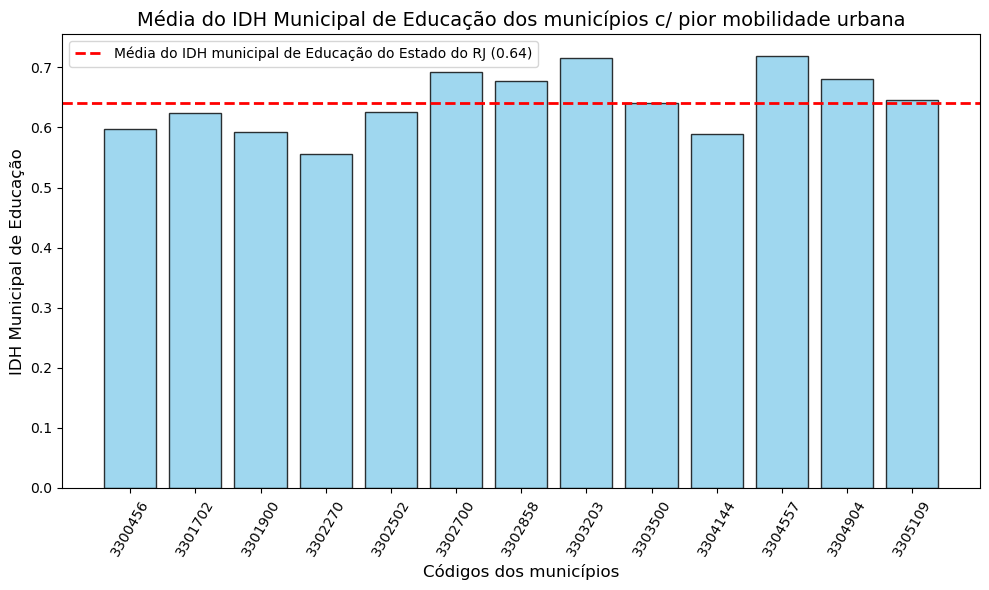

In [126]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["idhm_e"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_idhm_e_RJ, color='red', linestyle='--', linewidth=2, label=f"Média do IDH municipal de Educação do Estado do RJ ({media_idhm_e_RJ:.2f})")

# Configurações do gráfico
plt.title("Média do IDH Municipal de Educação dos municípios c/ pior mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("IDH Municipal de Educação", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Dos 13 municípios, 6 estão acima da média. Um resultado ambíguo.

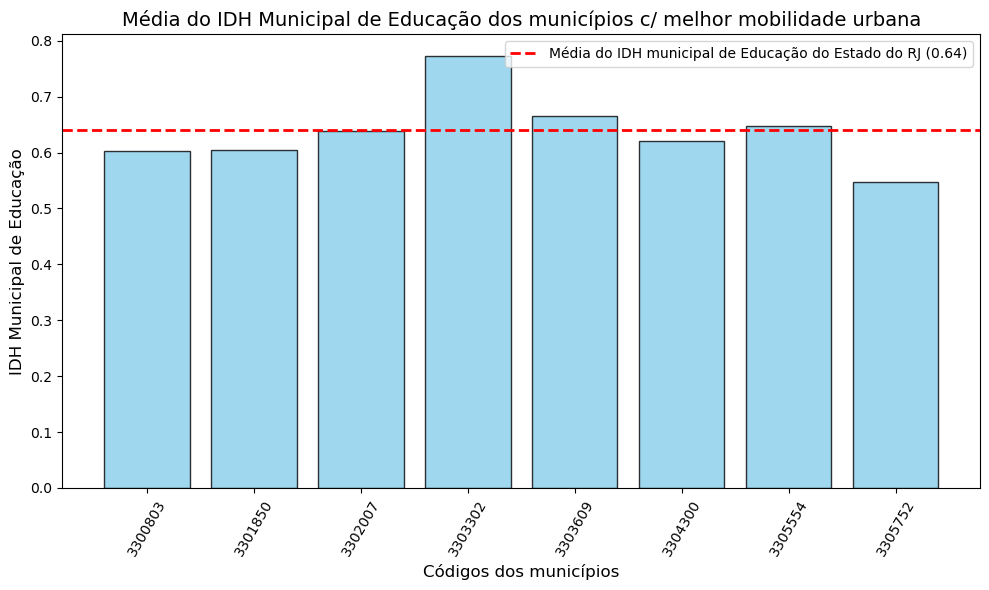

In [129]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["idhm_e"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_idhm_e_RJ, color='red', linestyle='--', linewidth=2, label=f"Média do IDH municipal de Educação do Estado do RJ ({media_idhm_e_RJ:.2f})")

# Configurações do gráfico
plt.title("Média do IDH Municipal de Educação dos municípios c/ melhor mobilidade urbana", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("IDH Municipal de Educação", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [131]:
media_idhm_e_RJ_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["idhm_e"].mean()
)
print(f"O IDH Municipal de Educação dos municípios c/ pior mobilidade urbana é de {media_idhm_e_RJ_piores:.3f}.\n")


media_idhm_e_RJ_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["idhm_e"].mean()
)
print(f"O IDH Municipal de Educação dos municípios c/ melhor mobilidade urbana é de {media_idhm_e_RJ_melhores:.3f}.\n")

O IDH Municipal de Educação dos municípios c/ pior mobilidade urbana é de 0.643.

O IDH Municipal de Educação dos municípios c/ melhor mobilidade urbana é de 0.637.



Diferença muito sutil entre os IDHm_e's, inconclusivo.

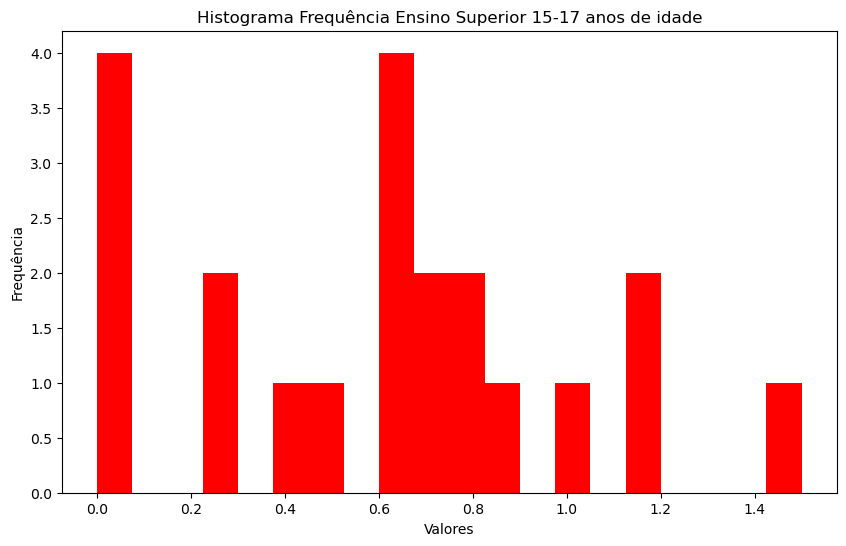

In [134]:
# Fazendo um histograma das taxas de frequência no ensino superior, das pessoas de 15 a 17 anos, no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["taxa_freq_superior_15_17"], bins=20, label='Taxa de frequência no ensino superior de pessoas de 15 a 17 anos de idade', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Frequência Ensino Superior 15-17 anos de idade")
plt.show()

Perceba que grande parte da população carioca que têm entre 15 e 17 anos de idade não está no ensino superior.

In [137]:
media_freq_superior_15_17 = sum(df_ADH_2010_RJ_filtrado["taxa_freq_superior_15_17"])/len(df_ADH_2010_RJ_filtrado["taxa_freq_superior_15_17"])
print(f"A média, em porcentagem, da população de 15 a 17 anos frequentando o ensino superior no Estado do RJ é de {media_freq_superior_15_17:.2f}%.\n")

A média, em porcentagem, da população de 15 a 17 anos frequentando o ensino superior no Estado do RJ é de 0.60%.



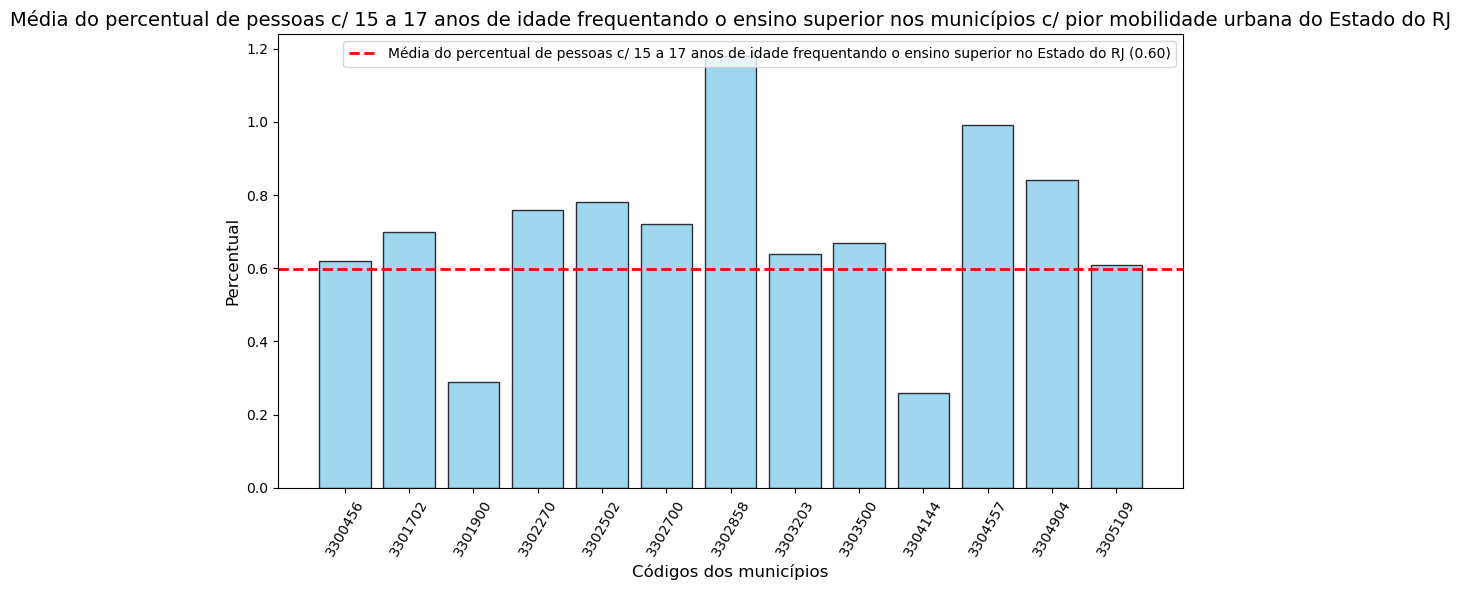

In [139]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["taxa_freq_superior_15_17"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_freq_superior_15_17, color='red', linestyle='--', linewidth=2, label=f"Média do percentual de pessoas c/ 15 a 17 anos de idade frequentando o ensino superior no Estado do RJ ({media_freq_superior_15_17:.2f})")

# Configurações do gráfico
plt.title("Média do percentual de pessoas c/ 15 a 17 anos de idade frequentando o ensino superior nos municípios c/ pior mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Percentual", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Surpreendentemente, grande parte dos municípios c/ pior mobilidade urbana está acima da média estadual de jovens frequentando o ensino superior. Isso pode comprovar que, de fato, não há uma relação bem estabelecida.

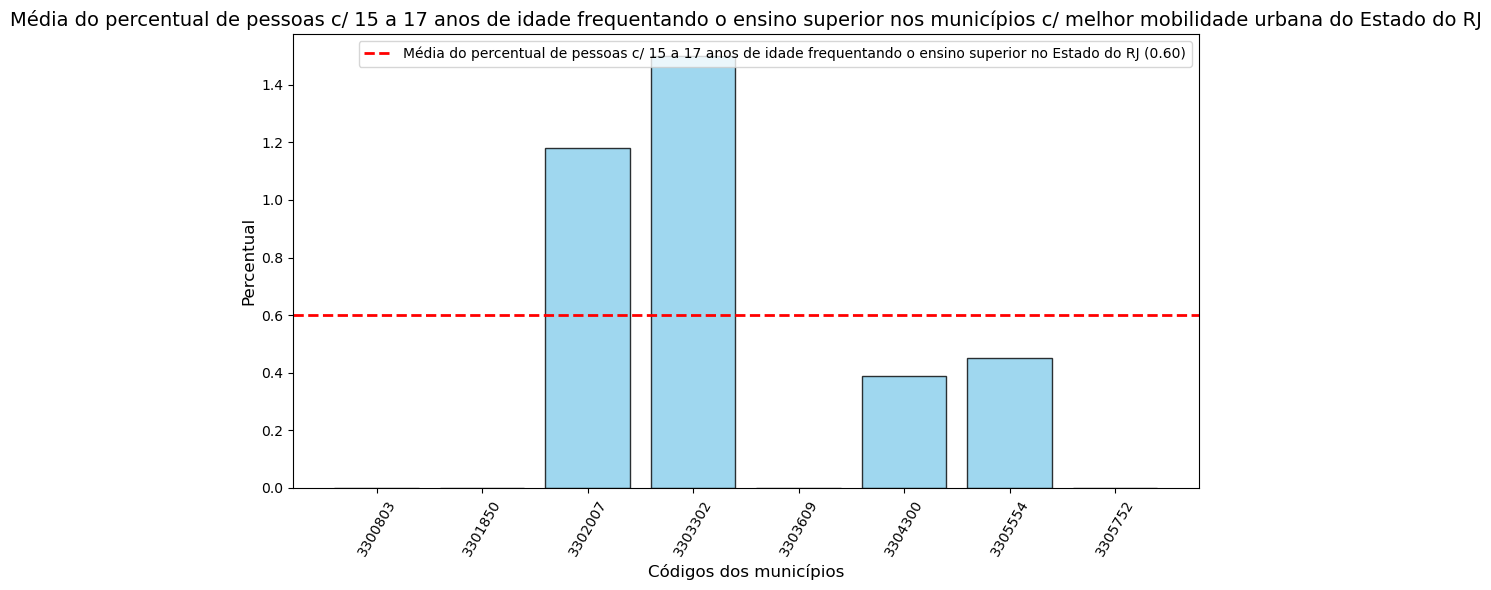

In [142]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["taxa_freq_superior_15_17"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_freq_superior_15_17, color='red', linestyle='--', linewidth=2, label=f"Média do percentual de pessoas c/ 15 a 17 anos de idade frequentando o ensino superior no Estado do RJ ({media_freq_superior_15_17:.2f})")

# Configurações do gráfico
plt.title("Média do percentual de pessoas c/ 15 a 17 anos de idade frequentando o ensino superior nos municípios c/ melhor mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Percentual", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [144]:
media_freq_superior_15_17_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["taxa_freq_superior_15_17"].mean()
)
print(f"O percentual de jovens entre 15 e 17 anos frequentando o ensino superior nos municípios c/ pior mobilidade urbana é de {media_freq_superior_15_17_piores:.3f}.\n")


media_freq_superior_15_17_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["taxa_freq_superior_15_17"].mean()
)
print(f"O percentual de jovens entre 15 e 17 anos frequentando o ensino superior nos municípios c/ melhor mobilidade urbana é de {media_freq_superior_15_17_melhores:.3f}.\n")

O percentual de jovens entre 15 e 17 anos frequentando o ensino superior nos municípios c/ pior mobilidade urbana é de 0.697.

O percentual de jovens entre 15 e 17 anos frequentando o ensino superior nos municípios c/ melhor mobilidade urbana é de 0.440.



Os municípios c/ pior mobilidade urbana apresentam dados melhores de frequência de jovens no ensino superior. Isso pode ser real ou dados estarem errados (3 municípios melhores estão c/ dados zerados).

## Analisando renda agora no âmbito estadual agora

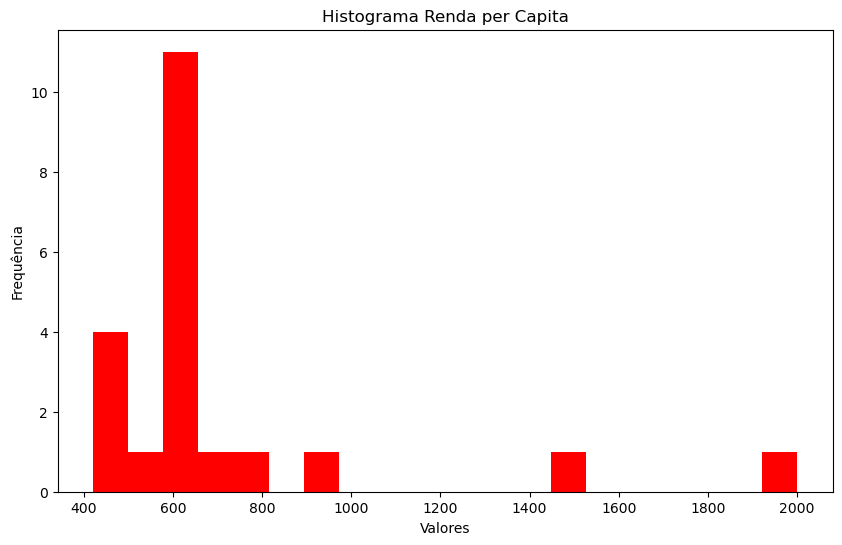

In [148]:
# Fazendo um histograma da renda per capita no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["renda_pc"], bins=20, label='Renda per capita', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Renda per Capita")
plt.show()

Perceba como o RJ é um estado pobre, onde grande parte da população está na pobreza.

In [151]:
media_renda_per_capita = sum(df_ADH_2010_RJ_filtrado["renda_pc"])/len(df_ADH_2010_RJ_filtrado["renda_pc"])
print(f"A renda per capita média no Estado do RJ é de {media_renda_per_capita:.2f}.\n")

A renda per capita média no Estado do RJ é de 709.59.



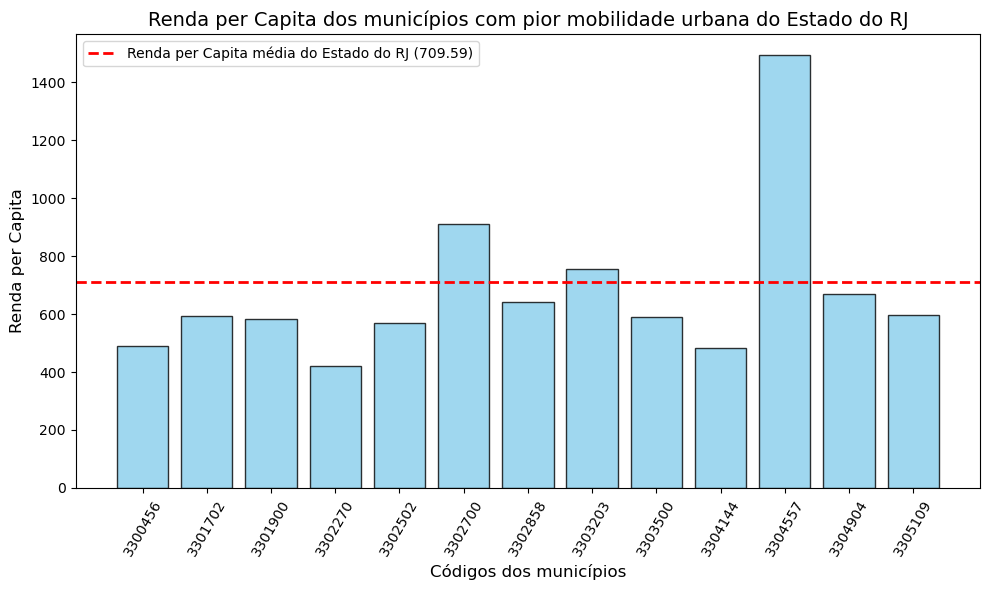

In [153]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["renda_pc"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_renda_per_capita, color='red', linestyle='--', linewidth=2, label=f"Renda per Capita média do Estado do RJ ({media_renda_per_capita:.2f})")

# Configurações do gráfico
plt.title("Renda per Capita dos municípios com pior mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Renda per Capita", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Grande parte dos municípios c/ mobilidade urbana ruim estão abaixo da RpC média.

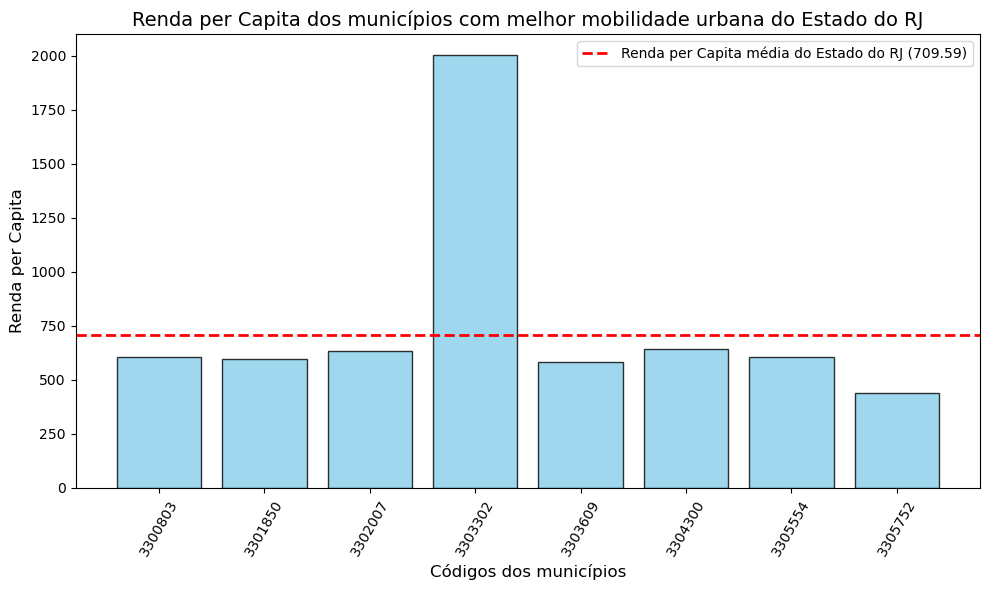

In [156]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["renda_pc"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_renda_per_capita, color='red', linestyle='--', linewidth=2, label=f"Renda per Capita média do Estado do RJ ({media_renda_per_capita:.2f})")

# Configurações do gráfico
plt.title("Renda per Capita dos municípios com melhor mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Renda per Capita", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

Grande parte dos municípios c/ melhor mobilidade urbana também estão abaixo da média.

In [159]:
media_renda_per_capita_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["renda_pc"].mean()
)
print(f"A renda per capita média dos municípios c/ pior mobilidade urbana é de {media_renda_per_capita_piores:.3f}.\n")


media_renda_per_capita_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["renda_pc"].mean()
)
print(f"A renda per capita média dos municípios c/ melhor mobilidade urbana é de {media_renda_per_capita_melhores:.3f}.\n")


A renda per capita média dos municípios c/ pior mobilidade urbana é de 676.719.

A renda per capita média dos municípios c/ melhor mobilidade urbana é de 762.999.



A diferença na renda per capita indica que pode haver uma relação.

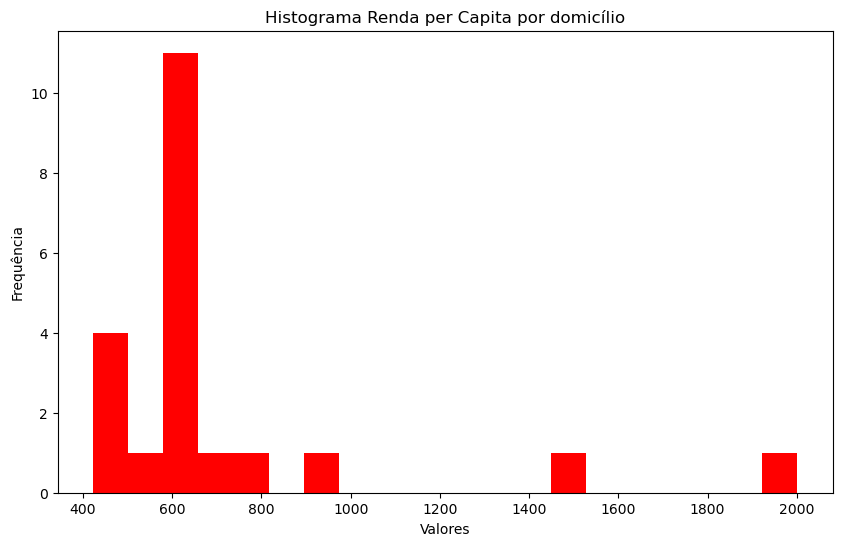

In [162]:
# Fazendo um histograma da renda per capita por domicílio, exceto renda nula, no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["renda_pc_exc_renda_nula"], bins=20, label='Renda per capita por domicílio', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma Renda per Capita por domicílio")
plt.show()

Mais uma vez, o Estado do RJ é um estado c/ grande parte da população na zona de pobreza.

In [165]:
media_renda_per_capita_domicilio = sum(df_ADH_2010_RJ_filtrado["renda_pc_exc_renda_nula"])/len(df_ADH_2010_RJ_filtrado["renda_pc_exc_renda_nula"])
print(f"A renda per capita, por domicílio, média no Estado do RJ é de {media_renda_per_capita_domicilio:.2f}.\n")

A renda per capita, por domicílio, média no Estado do RJ é de 711.00.



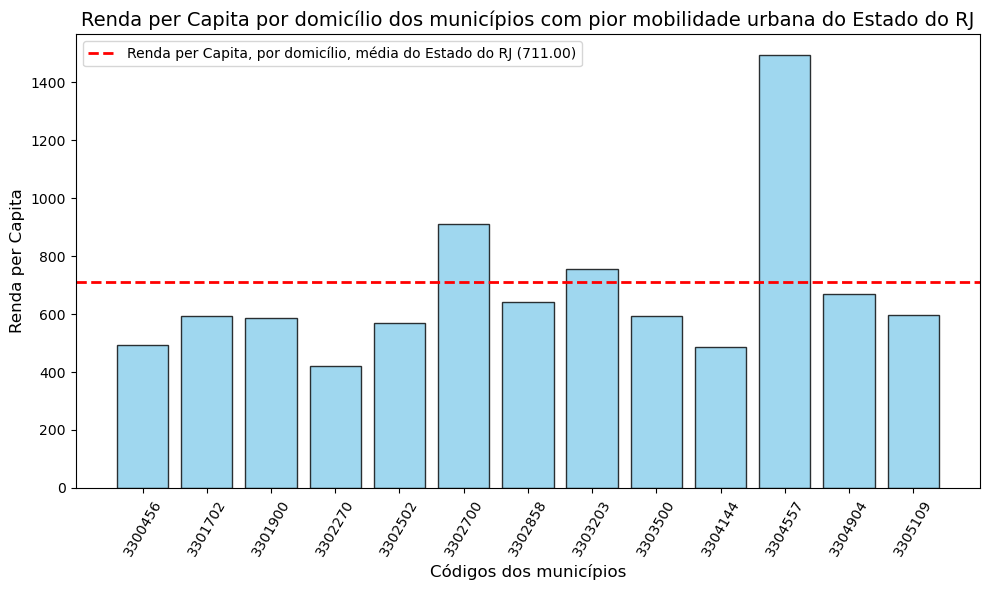

In [167]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["renda_pc_exc_renda_nula"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_renda_per_capita_domicilio, color='red', linestyle='--', linewidth=2, label=f"Renda per Capita, por domicílio, média do Estado do RJ ({media_renda_per_capita_domicilio:.2f})")

# Configurações do gráfico
plt.title("Renda per Capita por domicílio dos municípios com pior mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Renda per Capita", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

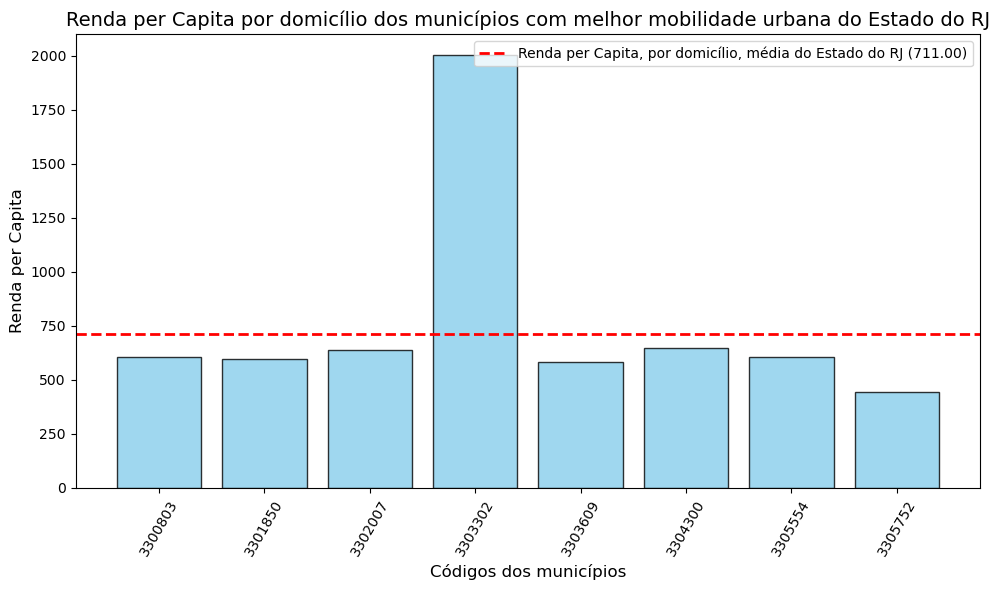

In [169]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["renda_pc_exc_renda_nula"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_renda_per_capita_domicilio, color='red', linestyle='--', linewidth=2, label=f"Renda per Capita, por domicílio, média do Estado do RJ ({media_renda_per_capita_domicilio:.2f})")

# Configurações do gráfico
plt.title("Renda per Capita por domicílio dos municípios com melhor mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("Renda per Capita", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMenorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [171]:
media_renda_per_capita_domicilio_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["renda_pc_exc_renda_nula"].mean()
)
print(f"A renda per capita por domicílio média dos municípios c/ pior mobilidade urbana é de {media_renda_per_capita_domicilio_piores:.3f}.\n")


media_renda_per_capita_domicilio_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["renda_pc_exc_renda_nula"].mean()
)
print(f"A renda per capita por domicílio média dos municípios c/ melhor mobilidade urbana é de {media_renda_per_capita_domicilio_melhores:.3f}.\n")


A renda per capita por domicílio média dos municípios c/ pior mobilidade urbana é de 677.760.

A renda per capita por domicílio média dos municípios c/ melhor mobilidade urbana é de 765.026.



A renda dos municípios c/ melhor mobilidade urbana parece ser melhor, portanto, pode haver uma relação.

### Por último, analisarei alguns dados de IDH isolado, como parâmetro de qualidade de vida.

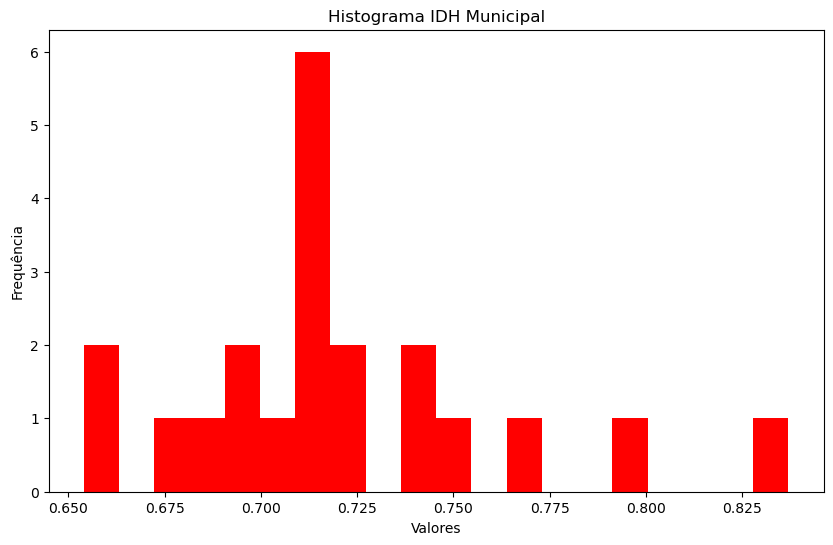

In [175]:
# Fazendo um histograma do IDH municipal no Estado do Rio de Janeiro:

plt.figure(figsize=(10, 6))
plt.hist(df_ADH_2010_RJ_filtrado["idhm"], bins=20, label='IDH Municipal', color='red')
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histograma IDH Municipal")
plt.show()

Perceba que os municípios fluminenses têm IDH municipal, em grande parte, menor que 0.750.

In [178]:
media_idhm = sum(df_ADH_2010_RJ_filtrado["idhm"])/len(df_ADH_2010_RJ_filtrado["idhm"])
print(f"O IDH Municipal médio no Estado do RJ é de {media_idhm:.3f}.\n")

O IDH Municipal médio no Estado do RJ é de 0.719.



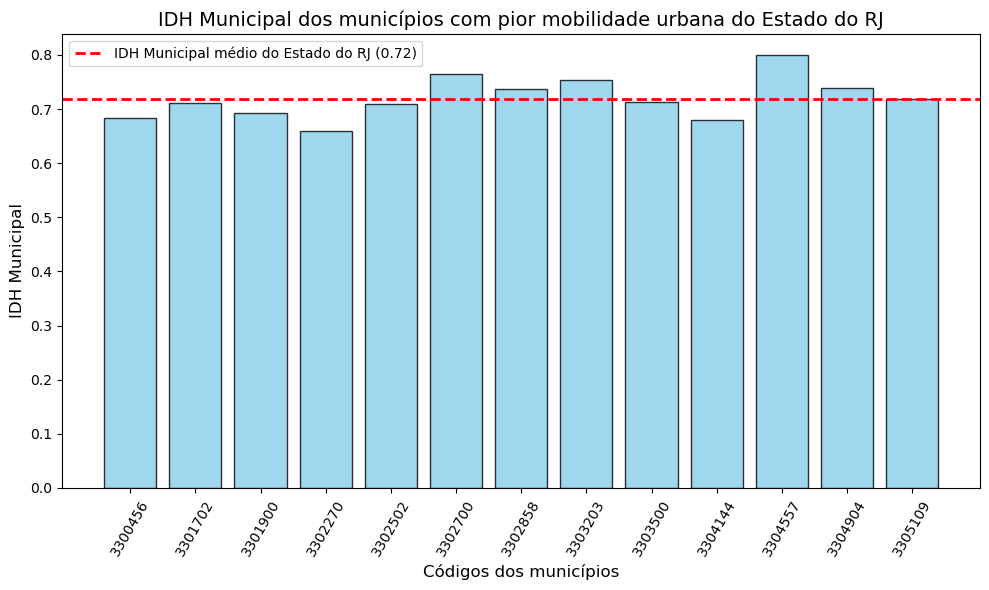

In [180]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMaiorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)]["idhm"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_idhm, color='red', linestyle='--', linewidth=2, label=f"IDH Municipal médio do Estado do RJ ({media_idhm:.2f})")

# Configurações do gráfico
plt.title("IDH Municipal dos municípios com pior mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("IDH Municipal", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMaiorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (13).

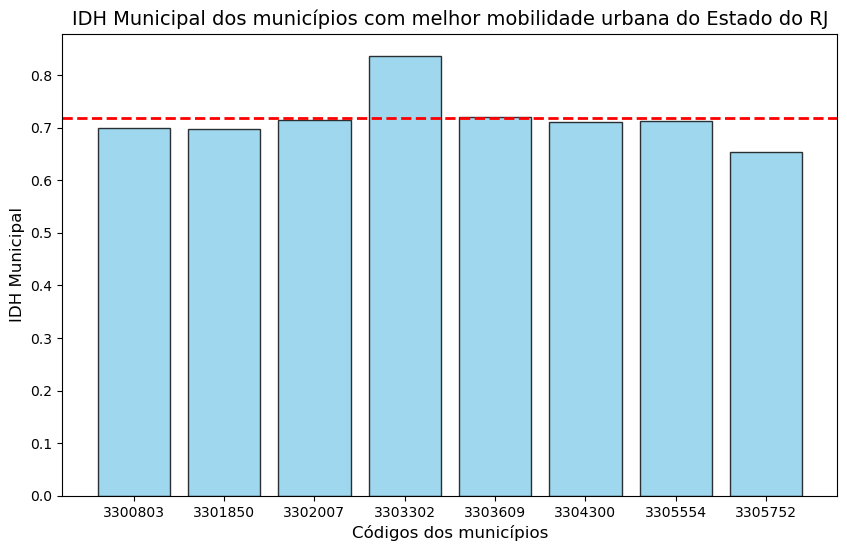

In [185]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(codigosMunicipiosMenorTempoProp, df_ADH_2010_RJ_filtrado[df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)]["idhm"], color='skyblue', edgecolor='black', alpha=0.8)

# Adiciona uma linha horizontal para a média
plt.axhline(y=media_idhm, color='red', linestyle='--', linewidth=2, label=f"IDH Municipal médio do Estado do RJ ({media_idhm:.2f})")

# Configurações do gráfico
plt.title("IDH Municipal dos municípios com melhor mobilidade urbana do Estado do RJ", fontsize=14)
plt.xlabel("Códigos dos municípios", fontsize=12)
plt.ylabel("IDH Municipal", fontsize=12)
plt.xticks(ticks=range(len(codigosMunicipiosMenorTempoProp)), labels=codigosMunicipiosMaiorTempoProp, rotation=60, fontsize=10)
plt.legend()
plt.tight_layout()

# Exibe o gráfico
plt.show()

In [187]:
media_idhm_municipios_piores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMaiorTempoProp)
    ]["idhm"].mean()
)
print(f"O IDH Municipal médio dos municípios c/ pior mobilidade urbana é de {media_idhm_municipios_piores:.3f}.\n")


media_idhm_municipios_melhores = (
    df_ADH_2010_RJ_filtrado[
        df_ADH_2010_RJ_filtrado["id_municipio"].isin(codigosMunicipiosMenorTempoProp)
    ]["idhm"].mean()
)
print(f"O IDH Municipal médio dos municípios c/ melhor mobilidade urbana é de {media_idhm_municipios_melhores:.3f}.\n")


O IDH Municipal médio dos municípios c/ pior mobilidade urbana é de 0.720.

O IDH Municipal médio dos municípios c/ melhor mobilidade urbana é de 0.718.



A diferença entre os IDH's médios é tão sutil que acredito não ser possível traçar uma relação.